<a href="https://colab.research.google.com/github/a-v-kolos/Allen_dataset_neuromatch_2025/blob/eline_stas/Allen_Visual_Behavior_Working_File_07_22_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Institute Visual Behavior 2P dataset overview
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
##### In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.


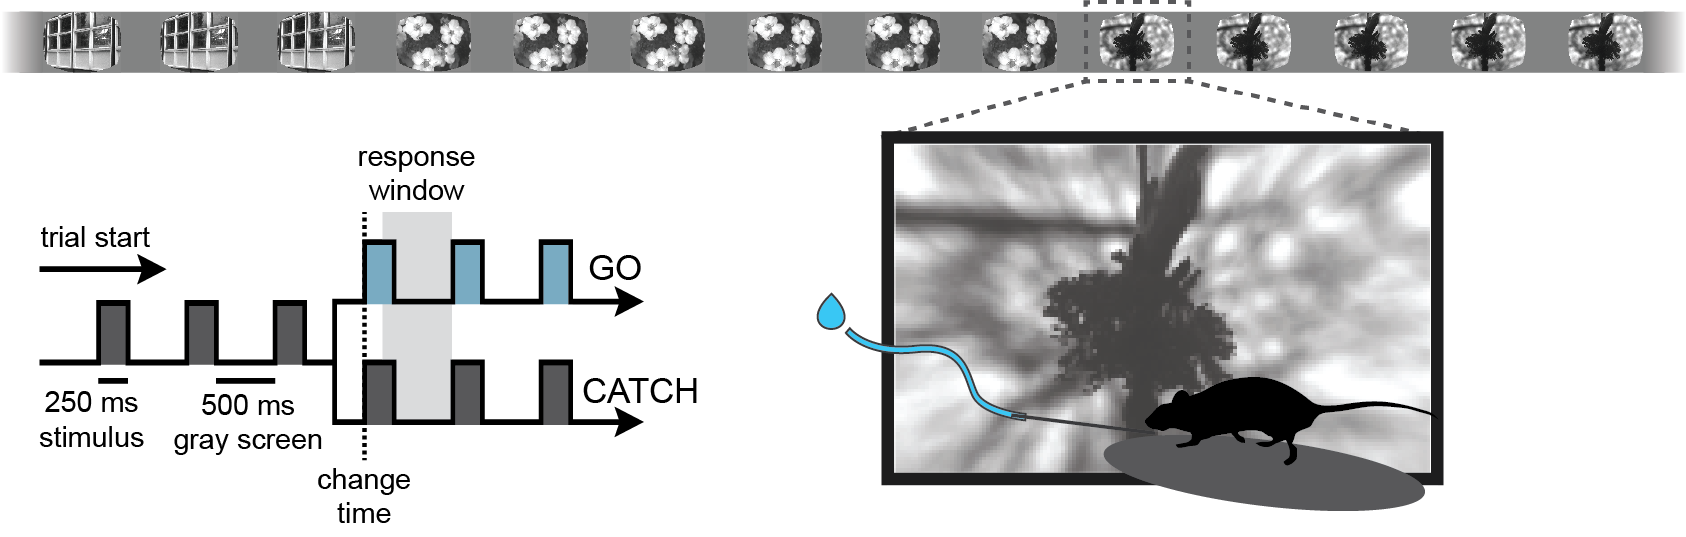

##### In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images.
##### During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.


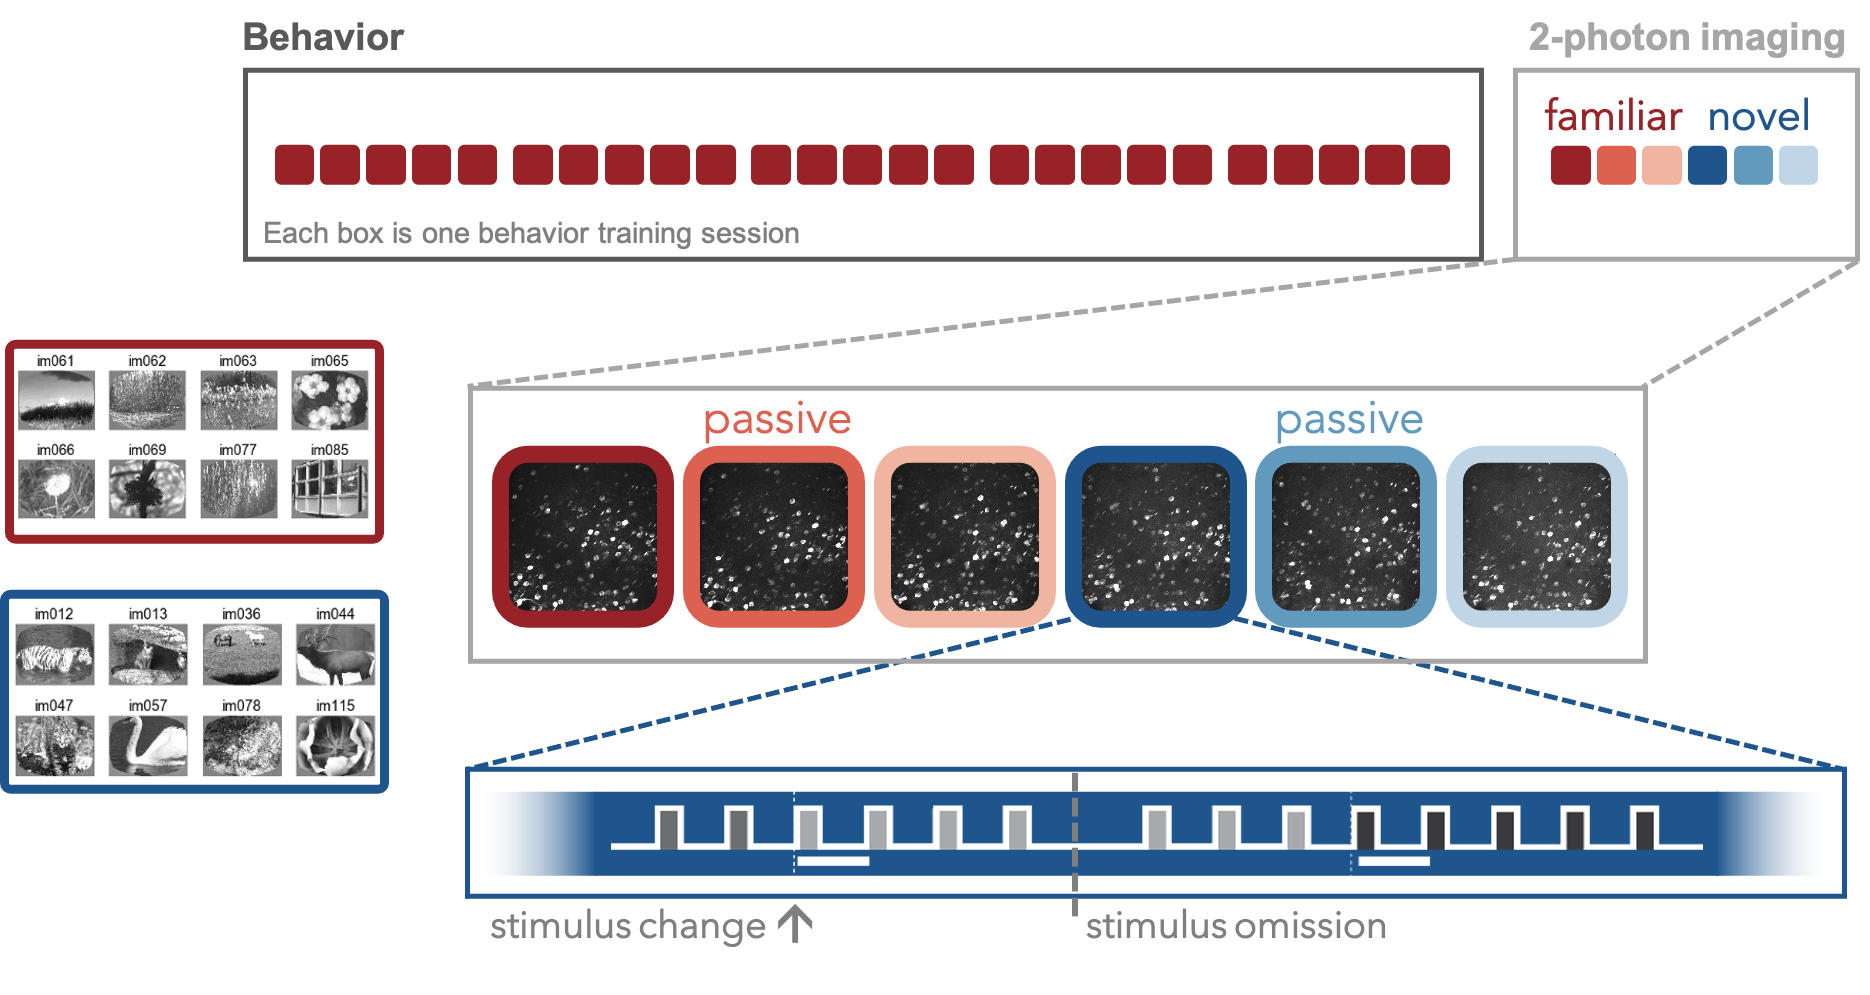

##### Multiple cortical areas and depths were measured concurrently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.

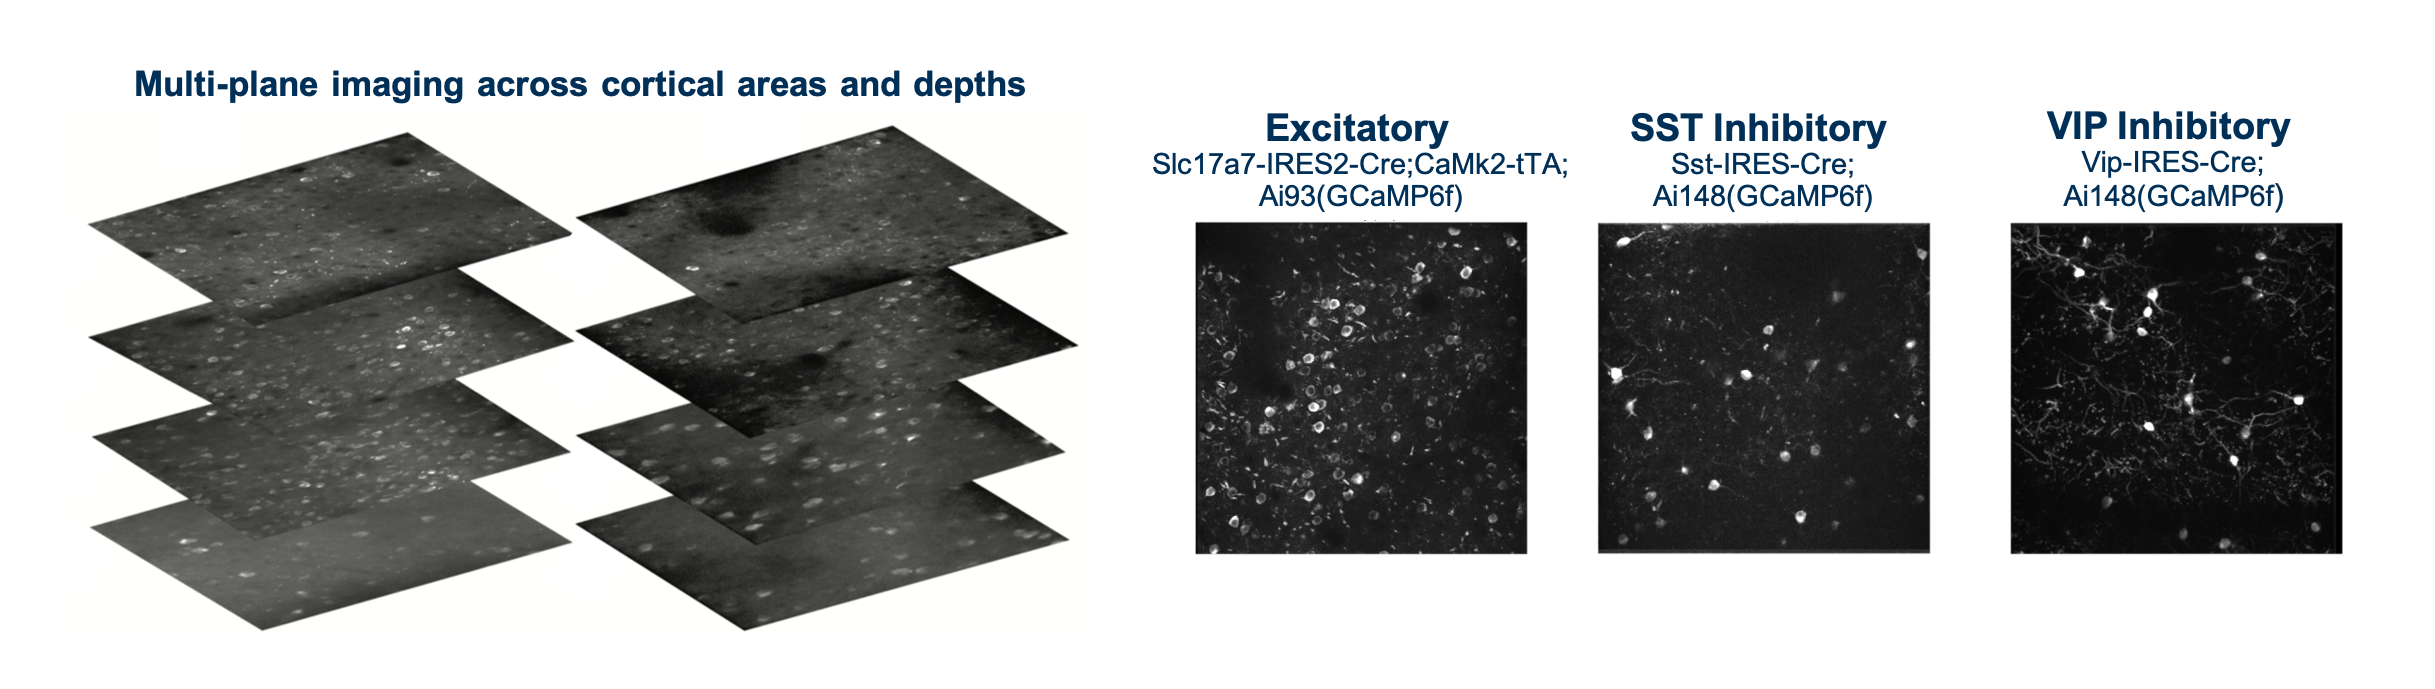

#### You can learn more about this dataset, behavioral task, and find other useful tools here:
#### [Overview page](https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html) and [Allen Brain Atlas](allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html)
#### This example will focus on the activity of the two inhibitory types - VIP and SST neurons.

# Loading the data

In [ ]:
# @title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet
!pip install  pyarrow # may be needed to read data file

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## For this example, we have pre-computed event triggered responses and saved them to figshare.
#### To access the full dataset, see `Allen_neuromatch_example_2.ipynb`, or go to the links at the bottom of this notebook
###This cell will download the responses.

In [ ]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

### Then we open it using the pandas `read_parquet` method


(parquet is just another file format)

In [ ]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

#### The data is organized as a pandas dataframe.
#### Each row contains all data for a given cell on a given trial


In [ ]:
data.sample(100)

stimulus_presentations_id  cell_specimen_id  \
1666961                         75        1086498976   
135364                        4129        1086498071   
1469819                       2753        1086560592   
49733                         2925        1086496500   
325047                        1058        1086497860   
...                            ...               ...   
1160071                        871        1086555432   
692014                        2678        1086490748   
689486                        2538        1086491215   
1469619                       2747        1086563829   
951441                        1121        1086500770   

                                                     trace  \
1666961  [0.020889664068818092, 0.048823773860931396, 0...   
135364   [0.27219513058662415, 0.43706297874450684, 0.2...   
1469819  [0.0727945938706398, 0.05796352028846741, 0.10...   
49733    [0.28818196058273315, 0.11567051708698273, 0.1...   
325047   [-0.0019431326072663069, 0.016031822189688683,...   
...                                                    ...   
1160071  [0.006333150900900364, -0.04693344235420227, -...   
692014   [0.0677705928683281, 0.032679446041584015, -0....   
689486   [-0.05607599392533302, -0.07680753618478775, 0...   
1469619  [0.20716260373592377, -0.017423810437321663, -...   
951441   [0.11559882760047913, 0.03560281917452812, -0....   

                                          trace_timestamps  mean_response  \
1666961  [-1.2279264819932727, -1.1956126272039762, -1....       0.006294   
135364   [-1.2281638329897349, -1.195843732121584, -1.1...      -0.058728   
1469819  [-1.2282367960132226, -1.1959147750655061, -1....      -0.034270   
49733    [-1.228133913303992, -1.1958145997959921, -1.1...      -0.036863   
325047   [-1.2281102725749526, -1.1957915811914013, -1....       0.015661   
...                                                    ...            ...   
1160071  [-1.2281906028244671, -1.1958697974869812, -1....       0.033106   
692014   [-1.2278459028873827, -1.1955341686008727, -1....      -0.027778   
689486   [-1.2278459028873827, -1.1955341686008727, -1....       0.013396   
1469619  [-1.2282367960132226, -1.1959147750655061, -1....       0.090087   
951441   [-1.2281171392291288, -1.1957982671441518, -1....       0.006289   

         baseline_response image_name  image_index  is_change  omitted  ...  \
1666961          -0.002391    omitted            8      False     True  ...   
135364           -0.015259    omitted            8      False     True  ...   
1469819          -0.020841    omitted            8      False     True  ...   
49733             0.011704    omitted            8      False     True  ...   
325047           -0.040349    omitted            8      False     True  ...   
...                    ...        ...          ...        ...      ...  ...   
1160071           0.068902      im075            2       True    False  ...   
692014            0.046839    omitted            8      False     True  ...   
689486            0.024276    omitted            8      False     True  ...   
1469619           0.011450      im069            7       True    False  ...   
951441           -0.026714    omitted            8      False     True  ...   

         ophys_session_id  ophys_container_id  behavior_session_id  \
1666961         963496285           969421516            963663505   
135364          994731371           991913453            994743822   
1469819        1005018474          1000740620           1005032062   
49733           994199725           991913453            994210659   
325047          967200850           957570596            967449308   
...                   ...                 ...                  ...   
1160071        1004317427          1000740620           1004344898   
692014          957189583           941373529            957331258   
689486          957189583           941373529            957331258   
1469619        10

In [ ]:
data.head()

stimulus_presentations_id  cell_specimen_id  \
85                          5        1086496689   
86                          5        1086501573   
87                          5        1086500533   
88                          5        1086497438   
89                          5        1086497908   

                                                trace  \
85  [0.06366926431655884, 0.002476318972185254, -0...   
86  [0.0637083426117897, 0.0919334813952446, -0.09...   
87  [0.0223990511149168, 0.22551870346069336, 0.11...   
88  [0.01795899122953415, 0.15271763503551483, 0.0...   
89  [0.059766266494989395, 0.03602207452058792, 0....   

                                     trace_timestamps  mean_response  \
85  [-1.228133913303992, -1.1958145997959921, -1.1...       0.006115   
86  [-1.228133913303992, -1.1958145997959921, -1.1...      -0.018832   
87  [-1.228133913303992, -1.1958145997959921, -1.1...      -0.041275   
88  [-1.228133913303992, -1.1958145997959921, -1.1...       0.039527   
89  [-1.228133913303992, -1.1958145997959921, -1.1...      -0.006628   

    baseline_response image_name  image_index  is_change  omitted  ...  \
85          -0.084113      im075            2       True    False  ...   
86          -0.025578      im075            2       True    False  ...   
87          -0.032698      im075            2       True    False  ...   
88          -0.026750      im075            2       True    False  ...   
89          -0.039277      im075            2       True    False  ...   

    ophys_session_id  ophys_container_id  behavior_session_id  \
85         994199725           991913453            994210659   
86         994199725           991913453            994210659   
87         994199725           991913453            994210659   
88         994199725           991913453            994210659   
89         994199725           991913453            994210659   

                                    full_genotype               reporter_line  \
85  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  Ai148(TIT2L-GC6f-ICL-tTA2)   
86  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  Ai148(TIT2L-GC6f-ICL-tTA2)   
87  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  Ai148(TIT2L-GC6f-ICL-tTA2)   
88  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  Ai148(TIT2L-GC6f-ICL-tTA2)   
89  Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt  Ai148(TIT2L-GC6f-ICL-tTA2)   

       driver_line indicator sex age_in_days  exposure_level  
85  [Sst-IRES-Cre]   GCaMP6f   M       196.0        familiar  
86  [Sst-IRES-Cre]   GCaMP6f   M       196.0        familiar  
87  [Sst-IRES-Cre]   GCaMP6f   M       196.0        familiar  
88  [Sst-IRES-Cre]   GCaMP6f   M       196.0        familiar  
89  [Sst-IRES-Cre]   GCaMP6f   M       196.0        familiar  

[5 rows x 31 columns]

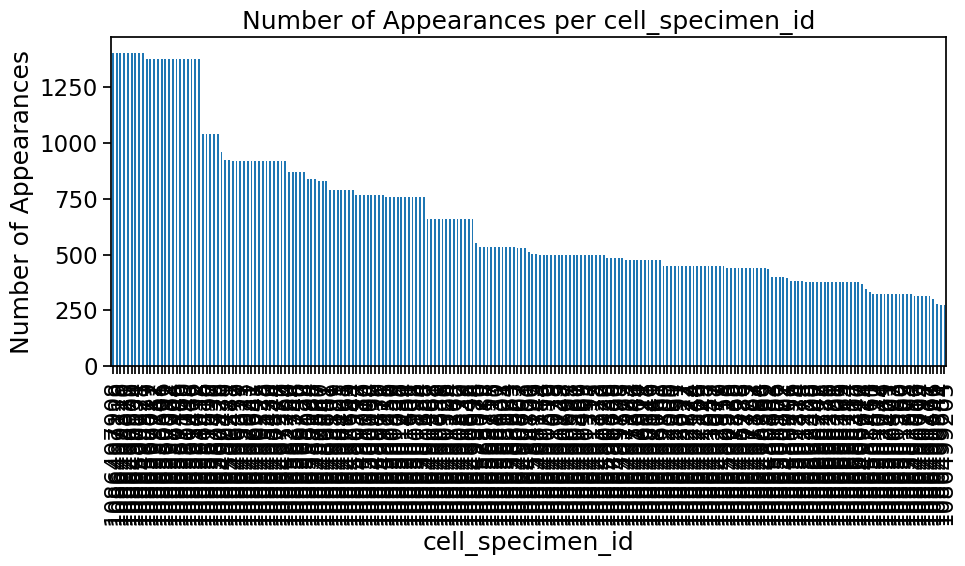

In [ ]:
# Assuming your DataFrame is named df
cell_counts = data['cell_specimen_id'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
cell_counts.plot(kind='bar')
plt.xlabel('cell_specimen_id')
plt.ylabel('Number of Appearances')
plt.title('Number of Appearances per cell_specimen_id')
plt.tight_layout()
plt.show()


##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




### Let's check what is available


In [ ]:
print('exposure_levels:', data.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [ ]:
print('stimulus presentations can be changes:', data.is_change.unique())

stimulus presentations can be changes: [ True False]


In [ ]:
print('stimulus presentations can be omitted:', data.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [ ]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [ ]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [ ]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset



# How are VIP and SST cells affected by stimulus novelty?

### Plot the population average change response for familiar and novel images for each cre line

Get trials where the image identity changed, for SST and VIP cells

In [ ]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

Plot the population average change response of SST cells for familiar and novel images

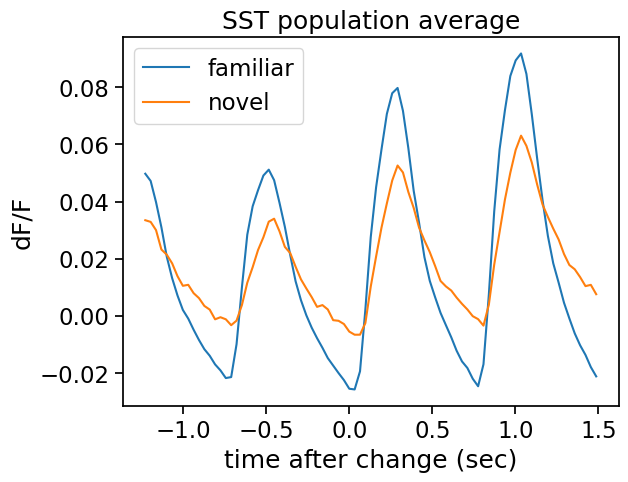

In [ ]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot the population average change response of VIP cells for familiar and novel images

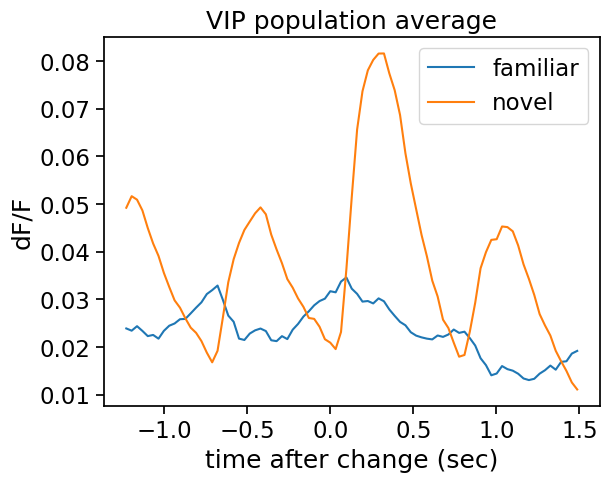

In [ ]:
timestamps = vip_data.trace_timestamps.values[0]
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set?

In [ ]:
# which cells are in more than one session? make a list
cells_in_multiple_sessions = []
for cell_specimen_id in vip_data.cell_specimen_id.unique():
  if len(vip_data[vip_data.cell_specimen_id == cell_specimen_id].ophys_session_id.unique()) > 1:
    cells_in_multiple_sessions.append(cell_specimen_id)

print(cells_in_multiple_sessions)

[np.int64(1086495458), np.int64(1086495538), np.int64(1086495170), np.int64(1086495264), np.int64(1086496225), np.int64(1086495925), np.int64(1086495377), np.int64(1086496359), np.int64(1086496472), np.int64(1086496547), np.int64(1086496681), np.int64(1086497031), np.int64(1086496844), np.int64(1086500839), np.int64(1086500898), np.int64(1086500959), np.int64(1086501038), np.int64(1086501134), np.int64(1086501280), np.int64(1086501226), np.int64(1086501454), np.int64(1086501538), np.int64(1086501601), np.int64(1086501688), np.int64(1086489847), np.int64(1086489860), np.int64(1086489891), np.int64(1086558904), np.int64(1086556416), np.int64(1086555432), np.int64(1086559188), np.int64(1086555190), np.int64(1086567589), np.int64(1086559446), np.int64(1086567897), np.int64(1086558341), np.int64(1086556696), np.int64(1086561830), np.int64(1086557997), np.int64(1086559782), np.int64(1086560048), np.int64(1086567017), np.int64(1086557082), np.int64(1086556094), np.int64(1086563032), np.int64(

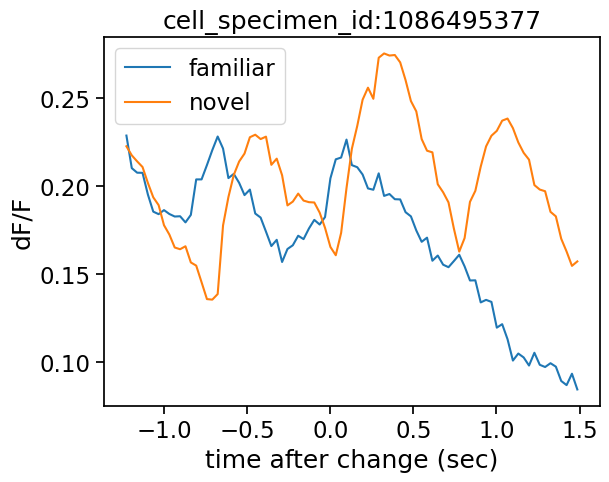

In [ ]:
# this one looks like the population average
example_cell_specimen_id = cells_in_multiple_sessions[6]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

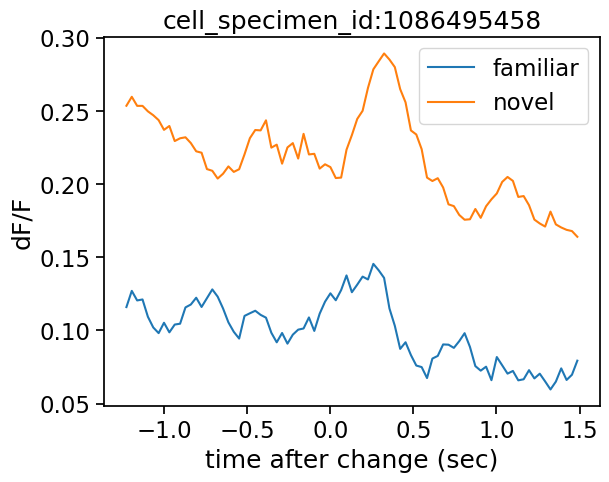

In [ ]:
# this one does not look like the population average
example_cell_specimen_id = cells_in_multiple_sessions[0]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### What about trial to trial variability? How does the response of a single cell vary across a session?



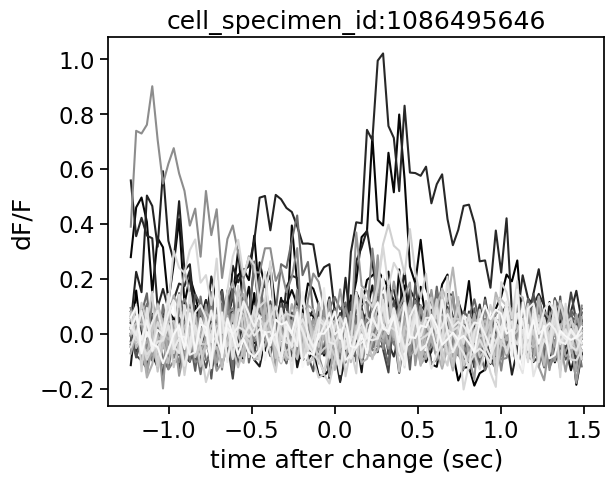

In [ ]:
# let's pick a cell from a novel image session
example_cell_specimen_id = vip_data[vip_data.exposure_level=='novel'].cell_specimen_id.unique()[7]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
cell_data = cell_data[(cell_data.image_name == cell_data.image_name.unique()[2])]

offset = 1 / len(cell_data.stimulus_presentations_id.unique())
color = [0, 0, 0]

for i, stimulus_presentations_id in enumerate(cell_data.stimulus_presentations_id.unique()):
  trial_data = cell_data[cell_data.stimulus_presentations_id == stimulus_presentations_id]
  timestamps = trial_data.trace_timestamps.values[0]
  trace = trial_data.trace.values[0]
  plt.plot(timestamps, trace, color = color)
  color = [color[0] + offset, color[1] + offset, color[2] + offset]
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.show()

# How do SST and VIP cells respond when stimuli are omitted?¶

### Plot the population average response to stimulus omission

Get trials where the stimulus was omitted, for SST and VIP cells

In [ ]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.omitted == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.omitted == True)]

Plot the population average omission response of SST cells for familiar and novel images

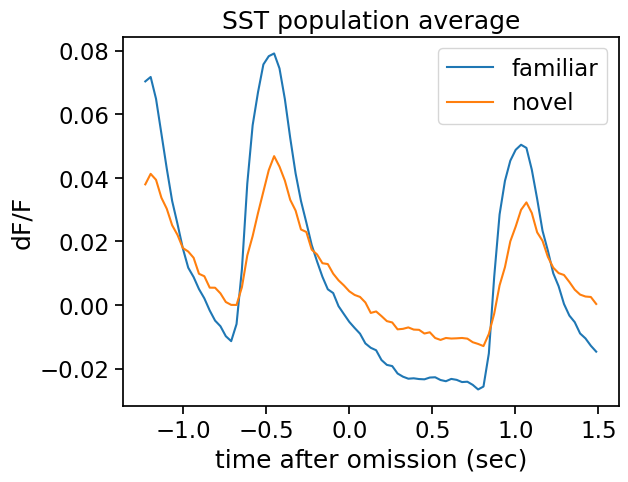

In [ ]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot population average omission response of VIP cells for familiar and novel images

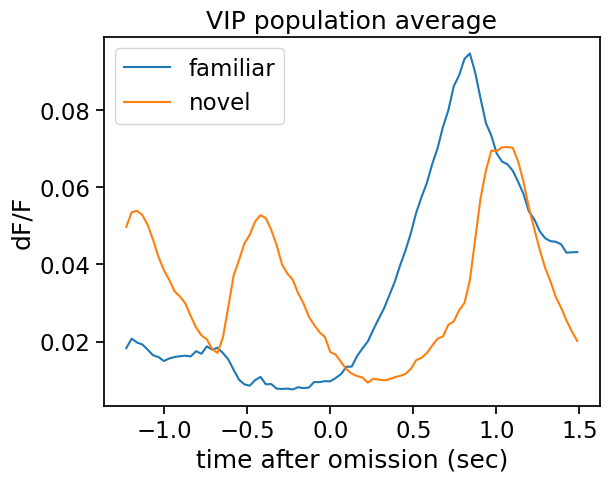

In [ ]:
timestamps = vip_data.trace_timestamps.values[0]  # trace timestamps are relative to stimulus onset
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

**Is the rate or geometry of representational drift different within a session (short timescale) versus between sessions (long timescale) in SST?**

**Drift rate:** How quickly the population vector moves away from its starting representation. Quantify as the Pearson correlation (ρ) between a reference activity vector and later activity vectors, convert it to a distance ( 1 – ρ )

**Drift geometry:** Whether the traces stay inside the same sub-space. Quantify as ...

**Steps:**
1. Within-session drift
- Loop through sessions
- Match trials to stimulus onset
- Take a reference (baseline)
- Rate: Compute correlation distance to that reference and plot versus elapsed time -> rate curve
- Geometry: ...

2. Between Session drift
- ...

Number of mice with SST cells recorded : 7
mouse_id
470784                          [957189583]
476970    [994199725, 994731371, 994883056]
477202               [979379271, 981863572]
480753               [985610440, 987623801]
485688               [992783847, 993265436]
Name: ophys_session_id, dtype: object

Mouse | Session | #cells | #trials | #traces (=rows)
470784 957189583    18      498      8964


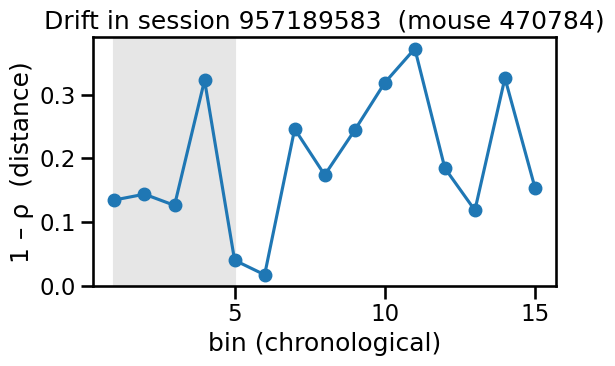

476970 994199725    17      484      8228
476970 994731371    13      478      6214
476970 994883056    16      442      7072
477202 979379271    12      401      4812
477202 981863572    9       367      3303
480753 985610440    4       301      1204
480753 987623801    3       228      684
485688 992783847    18      315      5670
485688 993265436    14      345      4830
489056 1001860744   13      378      4914
498972 1010684546   11      326      3586


In [ ]:
# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import pearsonr, linregress
sns.set_context("talk")

# Pull every SST row
sst_all = data[data.cre_line == "Sst-IRES-Cre"]

mouse2sessions_all = (
    sst_all[["mouse_id", "ophys_session_id"]]
      .drop_duplicates()
      .groupby("mouse_id")["ophys_session_id"]
      .apply(list)
)

print("Number of mice with SST cells recorded :", len(mouse2sessions_all))
print(mouse2sessions_all.head())

print("\nMouse | Session | #cells | #trials | #traces (=rows)")

results = []

# Loop through mouse and count traces and determine the drift (Bins = 30 )

for mouse, sess_list in mouse2sessions_all.items():
    for sid in sess_list:

        # dataframe for this session
        df_sess = sst_all[sst_all.ophys_session_id == sid]

        n_cells  = df_sess.cell_specimen_id.nunique()
        n_trials = df_sess.stimulus_presentations_id.nunique()
        n_rows   = len(df_sess)

        print(f"{mouse:<6} {sid:<12} {n_cells:<7} {n_trials:<8} {n_rows}")

        if n_trials < 30:
            continue

        # a. trial × cell matrix
        # Row = one trial’s population response (length = number of SST cells)
        # Column = response of the same cell across trials
        mat = (df_sess.groupby(["stimulus_presentations_id",
                                "cell_specimen_id"])["mean_response"]
                    .mean() # averages over trials -> 1 population vector per bin
                    .unstack("cell_specimen_id")
                    .sort_index())           # chronological order

        # b. split trial indices into 15 equal bins
        bins      = np.array_split(mat.index, 15)
        bin_vecs  = [mat.loc[idx].mean(0).values for idx in bins]

        # c. reference vector = mean of first 5 bins
        ref_vec   = np.vstack(bin_vecs[:5]).mean(0)

        # d. correlation-distance per bin
        dists = [1 - pearsonr(ref_vec, v)[0] for v in bin_vecs]

        # e. drift-rate proxy = slope of all bins
        slope, *_ = linregress(range(1, 16), dists)

        results.append({
            "mouse_id"        : mouse,
            "ophys_session_id": sid,
               "distances"       : dists,
            "slope"      : slope
        })

        # quick plot for the first session processed
        if len(results) == 1:
            plt.figure(figsize=(6,4))
            plt.plot(range(1,16), dists, marker='o')
            plt.axvspan(1,5, color="0.9")
            plt.xlabel("bin (chronological)")
            plt.ylabel("1 – ρ  (distance)")
            plt.title(f"Drift in session {sid}  (mouse {mouse})")
            plt.tight_layout()
            plt.show()

within_df = pd.DataFrame(results)

Number of mice with SST cells recorded : 7

Finished; analysed 148 cell-sessions


mouse_id  ophys_session_id  cell_specimen_id  slope_allbins  baseline_df_f  \
0   470784         957189583        1086490519      -0.000098       0.001401   
1   470784         957189583        1086490561      -0.000145       0.002769   
2   470784         957189583        1086490598       0.000010       0.002051   
3   470784         957189583        1086490697      -0.000074       0.021023   
4   470784         957189583        1086490748      -0.000349       0.009209   

   n_trials  
0       498  
1       498  
2       498  
3       498  
4       498

Plotting all cells from session 957189583 (mice in session: ['470784'])


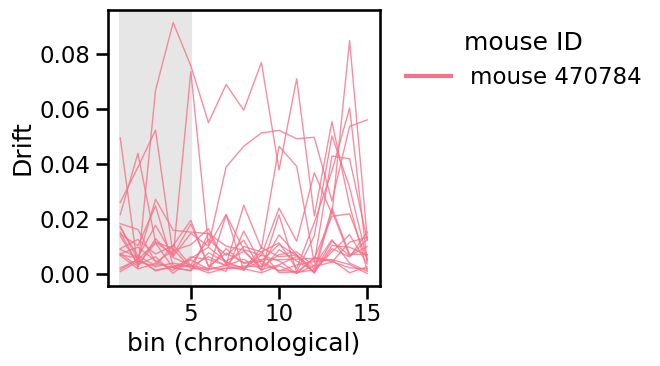

In [ ]:
# Code per cell

# Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import linregress
sns.set_context("talk")

# Pull every SST row
sst_all = data[data.cre_line == "Sst-IRES-Cre"]

mouse2sessions_all = (
    sst_all[["mouse_id", "ophys_session_id"]]
      .drop_duplicates()
      .groupby("mouse_id")["ophys_session_id"]
      .apply(list)
)

print("Number of mice with SST cells recorded :", len(mouse2sessions_all))

cell_records = []   # one dict per (cell, session)

for mouse, sess_list in mouse2sessions_all.items():
    for sid in sess_list:

        df_sess = sst_all[sst_all.ophys_session_id == sid]
        n_trials = df_sess.stimulus_presentations_id.nunique()
        if n_trials < 15:
            continue                        # need ≥15 trials for 15 bins

        # a. trial × cell matrix of mean_response
        mat = (df_sess.groupby(["stimulus_presentations_id",
                                "cell_specimen_id"])["mean_response"]
                   .mean()
                   .unstack("cell_specimen_id")
                   .sort_index())           # trials in chronological order

        # b. split trial indices into 15 bins
        bins = np.array_split(mat.index, 15)
        # (len(bins) == 15, each entry is an array of trial IDs)

        # c. per-cell baseline = mean of first 5 bins
        baseline = mat.loc[np.hstack(bins[:5])].mean(0)   # Series indexed by cell_id

        # d. per-cell Δ (absolute change) for each bin
        cell_ids = mat.columns
        bin_changes = []
        for idx in bins:
            bin_mean = mat.loc[idx].mean(0)               # Series per cell
            bin_changes.append((bin_mean - baseline).abs().values)  # 1D array len = n_cells
        # bin_changes = list of 15 arrays; stack to 15×n_cells
        changes = np.vstack(bin_changes)                  # shape (15, n_cells)

        # e. slope of change vs. bin for each cell
        x = np.arange(1, 16)                              # 1 … 15
        for j, cid in enumerate(cell_ids):
            slope, *_ = linregress(x, changes[:, j])

            cell_records.append({
                "mouse_id"        : mouse,
                "ophys_session_id": sid,
                "cell_specimen_id": cid,
                "slope_allbins"   : slope,
                "baseline_df_f"   : baseline.loc[cid],
                "n_trials"        : n_trials
            })

# Assemble tidy DataFrame
cell_df = pd.DataFrame(cell_records)
print("\nFinished; analysed", len(cell_df), "cell-sessions")
display(cell_df.head())

# Choose a session to plot  (edit this ID or pick the first in cell_df)

session_to_plot = cell_df["ophys_session_id"].iloc[0]   # first one in table
mouse_ids_in_session = cell_df.loc[
    cell_df.ophys_session_id == session_to_plot, "mouse_id"
].unique()

print(f"Plotting all cells from session {session_to_plot} "
      f"(mice in session: {mouse_ids_in_session})")


# 15-bin change matrix for that session
df_sess = sst_all[sst_all.ophys_session_id == session_to_plot]

# trial × cell matrix
mat = (df_sess.groupby(["stimulus_presentations_id", "cell_specimen_id"])
               ["mean_response"].mean().unstack("cell_specimen_id").sort_index())

bins        = np.array_split(mat.index, 15)
baseline    = mat.loc[np.hstack(bins[:5])].mean(0)

bin_changes = []
for idx in bins:
    bin_mean = mat.loc[idx].mean(0)
    bin_changes.append((bin_mean - baseline).abs())       # pandas Series per cell

# stack → DataFrame: rows = bins 1…15, cols = cell IDs
change_mat = pd.DataFrame(bin_changes, index=np.arange(1,16)).T


# set up a colour for each mouse present in this session
palette = dict(zip(
    mouse_ids_in_session,
    sns.color_palette("husl", len(mouse_ids_in_session))
))

cell2mouse = df_sess.drop_duplicates("cell_specimen_id")\
                    .set_index("cell_specimen_id")["mouse_id"]

# Plot every cell’s drift curve, coloured by mouse
plt.figure(figsize=(7,4))
for cid, series in change_mat.iterrows():
    mouse = cell2mouse.loc[cid]
    plt.plot(change_mat.columns, series, lw=1,
             color=palette[mouse], alpha=0.8)

plt.axvspan(1,5, color="0.9")     # highlight baseline bins
plt.xlabel("bin (chronological)")
plt.ylabel("Drift")
# build a legend from the mouse-colour mapping
handles = [plt.Line2D([0],[0], color=c, lw=3) for c in palette.values()]
plt.legend(handles, [f"mouse {m}" for m in palette.keys()],
           title="mouse ID", frameon=False, bbox_to_anchor=(1.02,1),
           loc="upper left")
plt.tight_layout()
plt.show()

Within a mouse between two sessions, data selected:
- Familiar images
- SST
- V1
- Depth
- Session: OPHYS_3_images_B

shape (rows, columns): (25380, 31)
unique mice : 7
unique sessions : 8
unique cells : 96
Mouse 476970, sessions 994199725, 994731371
10 cells imaged in both sessions


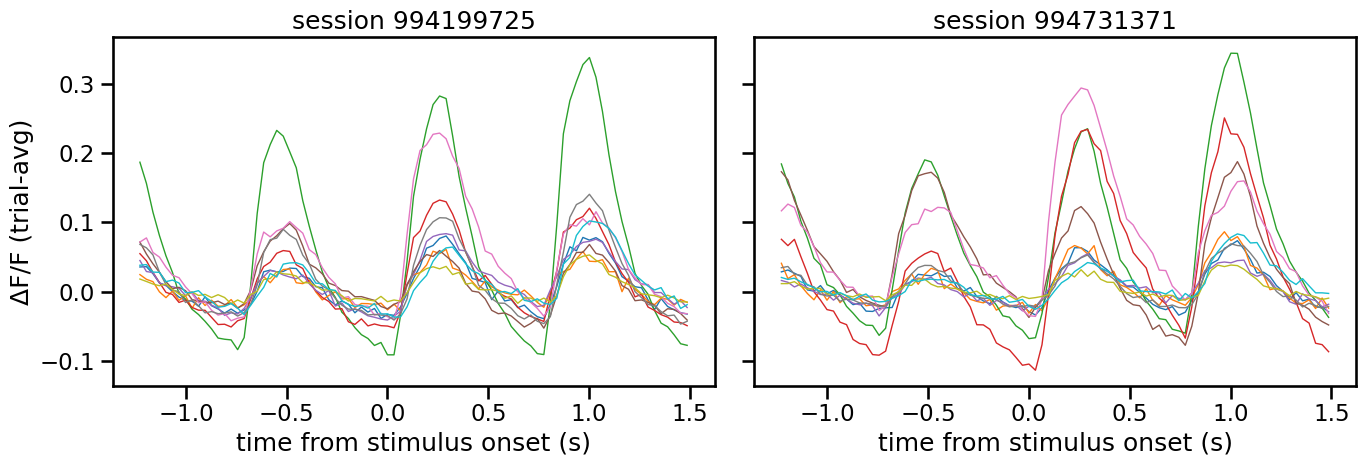

In [ ]:
# Select the data, one mouse & two sessions
sst_data_2 = data[
    (data.cre_line           == "Sst-IRES-Cre") &
    (data.omitted            == False) &
    (data.exposure_level     == "familiar") &
    (data.targeted_structure == "VISp") &
    (data.session_type       == "OPHYS_3_images_B")
]

print("shape (rows, columns):", sst_data_2.shape)
print("unique mice :", sst_data_2.mouse_id.nunique())
print("unique sessions :", sst_data_2.ophys_session_id.nunique())
print("unique cells :", sst_data_2.cell_specimen_id.nunique())

# Find mouse with two sessions
mice_with_two = (
    sst_data_2.groupby("mouse_id")["ophys_session_id"]
              .nunique()
              .loc[lambda x: x >= 2]
              .index
)
assert len(mice_with_two) > 0, "No mouse in this data-slice has ≥2 sessions."

mouse_id = mice_with_two[0]
mouse_df = sst_data_2[sst_data_2.mouse_id == mouse_id]
sessions  = sorted(mouse_df.ophys_session_id.unique())[:2]
sess_a, sess_b = sessions
print(f"Mouse {mouse_id}, sessions {sess_a}, {sess_b}")

# Trial- averaged trace per cell, per session

def mean_trace_by_cell(session_id):
    tmp = mouse_df[mouse_df.ophys_session_id == session_id]
    traces = (tmp.groupby("cell_specimen_id")["trace"]
                  .apply(lambda x: np.stack(x).mean(0)))
    return traces        # pandas Series: index=cell_id, value=np.array(trace)

traces_a = mean_trace_by_cell(sess_a)
traces_b = mean_trace_by_cell(sess_b)

# keep cells recorded in both sessions
common_cells = traces_a.index.intersection(traces_b.index)
traces_a = traces_a.loc[common_cells]
traces_b = traces_b.loc[common_cells]
print(f"{len(common_cells)} cells imaged in both sessions")

# Plot traces per cell per session
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set_context("talk")

t = mouse_df.trace_timestamps.iloc[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, traces, sid in zip(axes, [traces_a, traces_b], sessions):
    for tr in traces:
        ax.plot(t, tr, lw=1)
    ax.set_title(f"session {sid}")
    ax.set_xlabel("time from stimulus onset (s)")
axes[0].set_ylabel("ΔF/F (trial-avg)")
plt.tight_layout()
plt.show()

Does the omission response correlate with behavior?

How do the dynamics of image and omission evoked activity change over time during the novel image session?

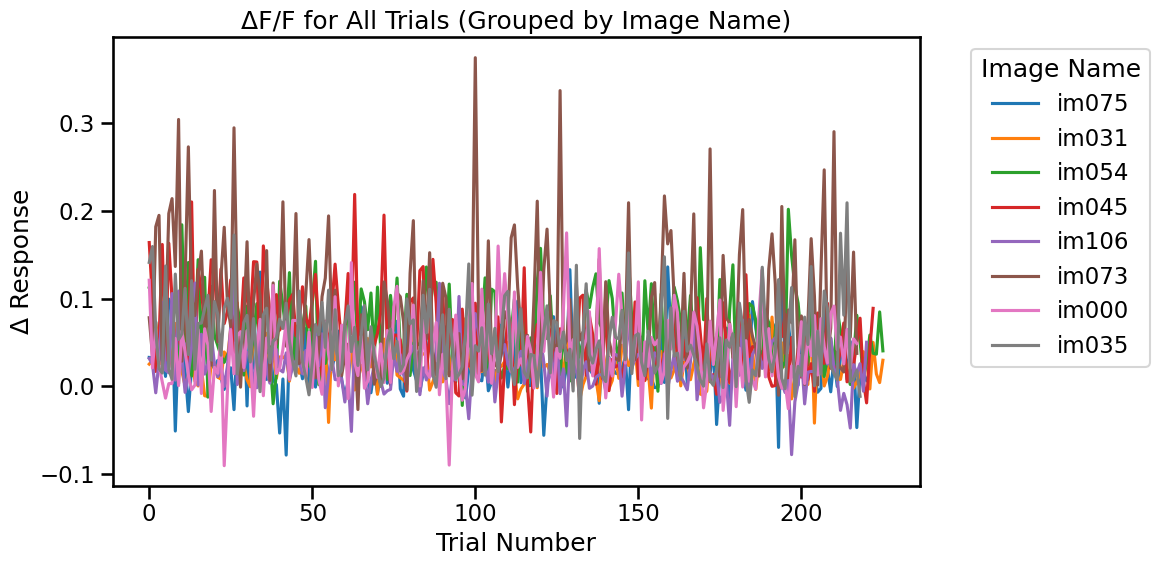

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Average per stimulus_presentations_id
agg_df = (
    sst_data_2
    .groupby(['stimulus_presentations_id', 'image_name'], as_index=False)
    .agg({
        'mean_response': 'mean',
        'baseline_response': 'mean'
    })
)

# Step 2: Compute Δ response
agg_df['delta_response'] = agg_df['mean_response'] - agg_df['baseline_response']

# Step 3: Add trial index (just to plot x-axis meaningfully)
agg_df['trial_number'] = agg_df.groupby('image_name').cumcount()

# Step 4: Plot all trials
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_df, x='trial_number', y='delta_response', hue='image_name', marker=None)
plt.title('ΔF/F for All Trials (Grouped by Image Name)')
plt.xlabel('Trial Number')
plt.ylabel('Δ Response')
plt.legend(title='Image Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

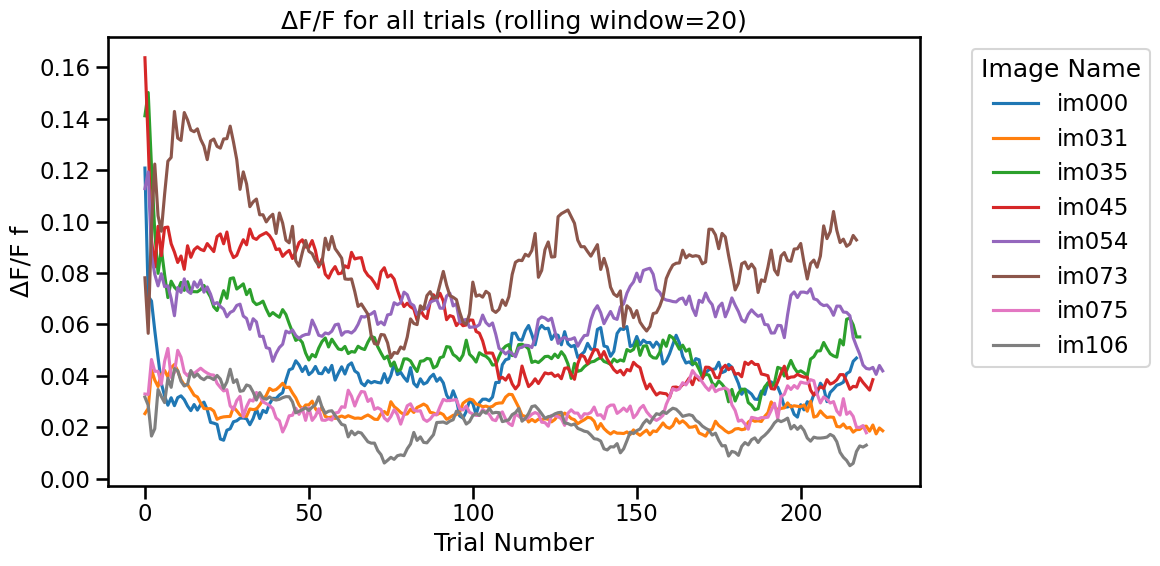

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Average per stimulus_presentations_id
agg_df = (
    sst_data_2
    .groupby(['stimulus_presentations_id', 'image_name'], as_index=False)
    .agg({
        'mean_response': 'mean',
        'baseline_response': 'mean'
    })
)

# Step 2: Compute Δ response
agg_df['delta_response'] = agg_df['mean_response'] - agg_df['baseline_response']

# Step 3: Sort and assign trial number per image_name
agg_df = agg_df.sort_values(['image_name', 'stimulus_presentations_id'])
agg_df['trial_number'] = agg_df.groupby('image_name').cumcount()

# Step 4: Compute rolling average
agg_df['rolling_delta'] = (
    agg_df.groupby('image_name')['delta_response']
    .transform(lambda x: x.rolling(window=20, min_periods=1).mean())
)

# Step 5: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_df, x='trial_number', y='rolling_delta', hue='image_name')
plt.title('ΔF/F for all trials (rolling window=20)')
plt.xlabel('Trial Number')
plt.ylabel('ΔF/F f')
plt.legend(title='Image Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipython-input-30-1611366111.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_df = agg_df.groupby('image_name', group_keys=False).apply(rolling_stats)


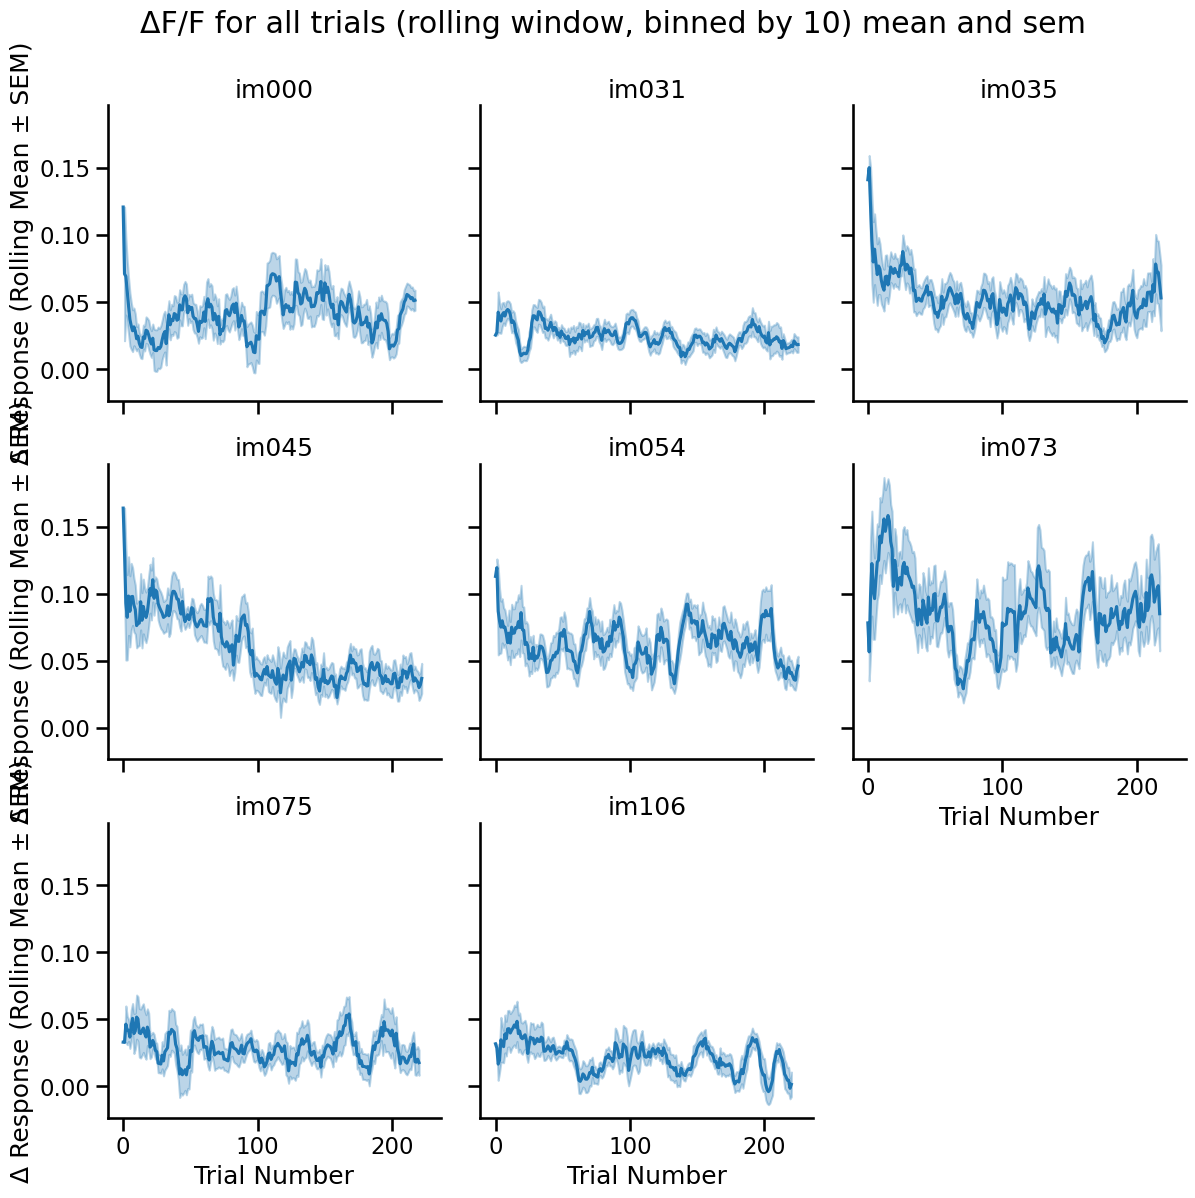

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Average per stimulus_presentations_id
agg_df = (
    sst_data_2
    .groupby(['stimulus_presentations_id', 'image_name'], as_index=False)
    .agg({
        'mean_response': 'mean',
        'baseline_response': 'mean'
    })
)

# Step 2: Δ response
agg_df['delta_response'] = agg_df['mean_response'] - agg_df['baseline_response']

# Step 3: Sort and assign trial number
agg_df = agg_df.sort_values(['image_name', 'stimulus_presentations_id'])
agg_df['trial_number'] = agg_df.groupby('image_name').cumcount()

# Step 4: Compute rolling mean and SEM
def rolling_stats(df, window=10):
    df = df.copy()
    df['rolling_mean'] = df['delta_response'].rolling(window=window, min_periods=1).mean()
    df['rolling_sem'] = df['delta_response'].rolling(window=window, min_periods=1).apply(
        lambda x: x.std(ddof=1) / np.sqrt(len(x)), raw=False)
    return df

rolling_df = agg_df.groupby('image_name', group_keys=False).apply(rolling_stats)

# Step 5: Plot with shaded SEM using FacetGrid
g = sns.FacetGrid(rolling_df, col="image_name", col_wrap=3, height=4, sharey=True)

def plot_with_shade(data, color, **kwargs):
    x = data['trial_number']
    y = data['rolling_mean']
    sem = data['rolling_sem']
    plt.plot(x, y, color=color)
    plt.fill_between(x, y - sem, y + sem, color=color, alpha=0.3)

g.map_dataframe(plot_with_shade)

# Final touches
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Trial Number", "Δ Response (Rolling Mean ± SEM)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("ΔF/F for all trials (rolling window, binned by 10) mean and sem")
plt.show()

/tmp/ipython-input-31-1384375997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst_data_2['delta_response'] = sst_data_2['mean_response'] - sst_data_2['baseline_response']
/tmp/ipython-input-31-1384375997.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_df = sst_data_2.groupby(['image_name', 'cell_specimen_id'], group_keys=False).apply(rolling_cell_stats)


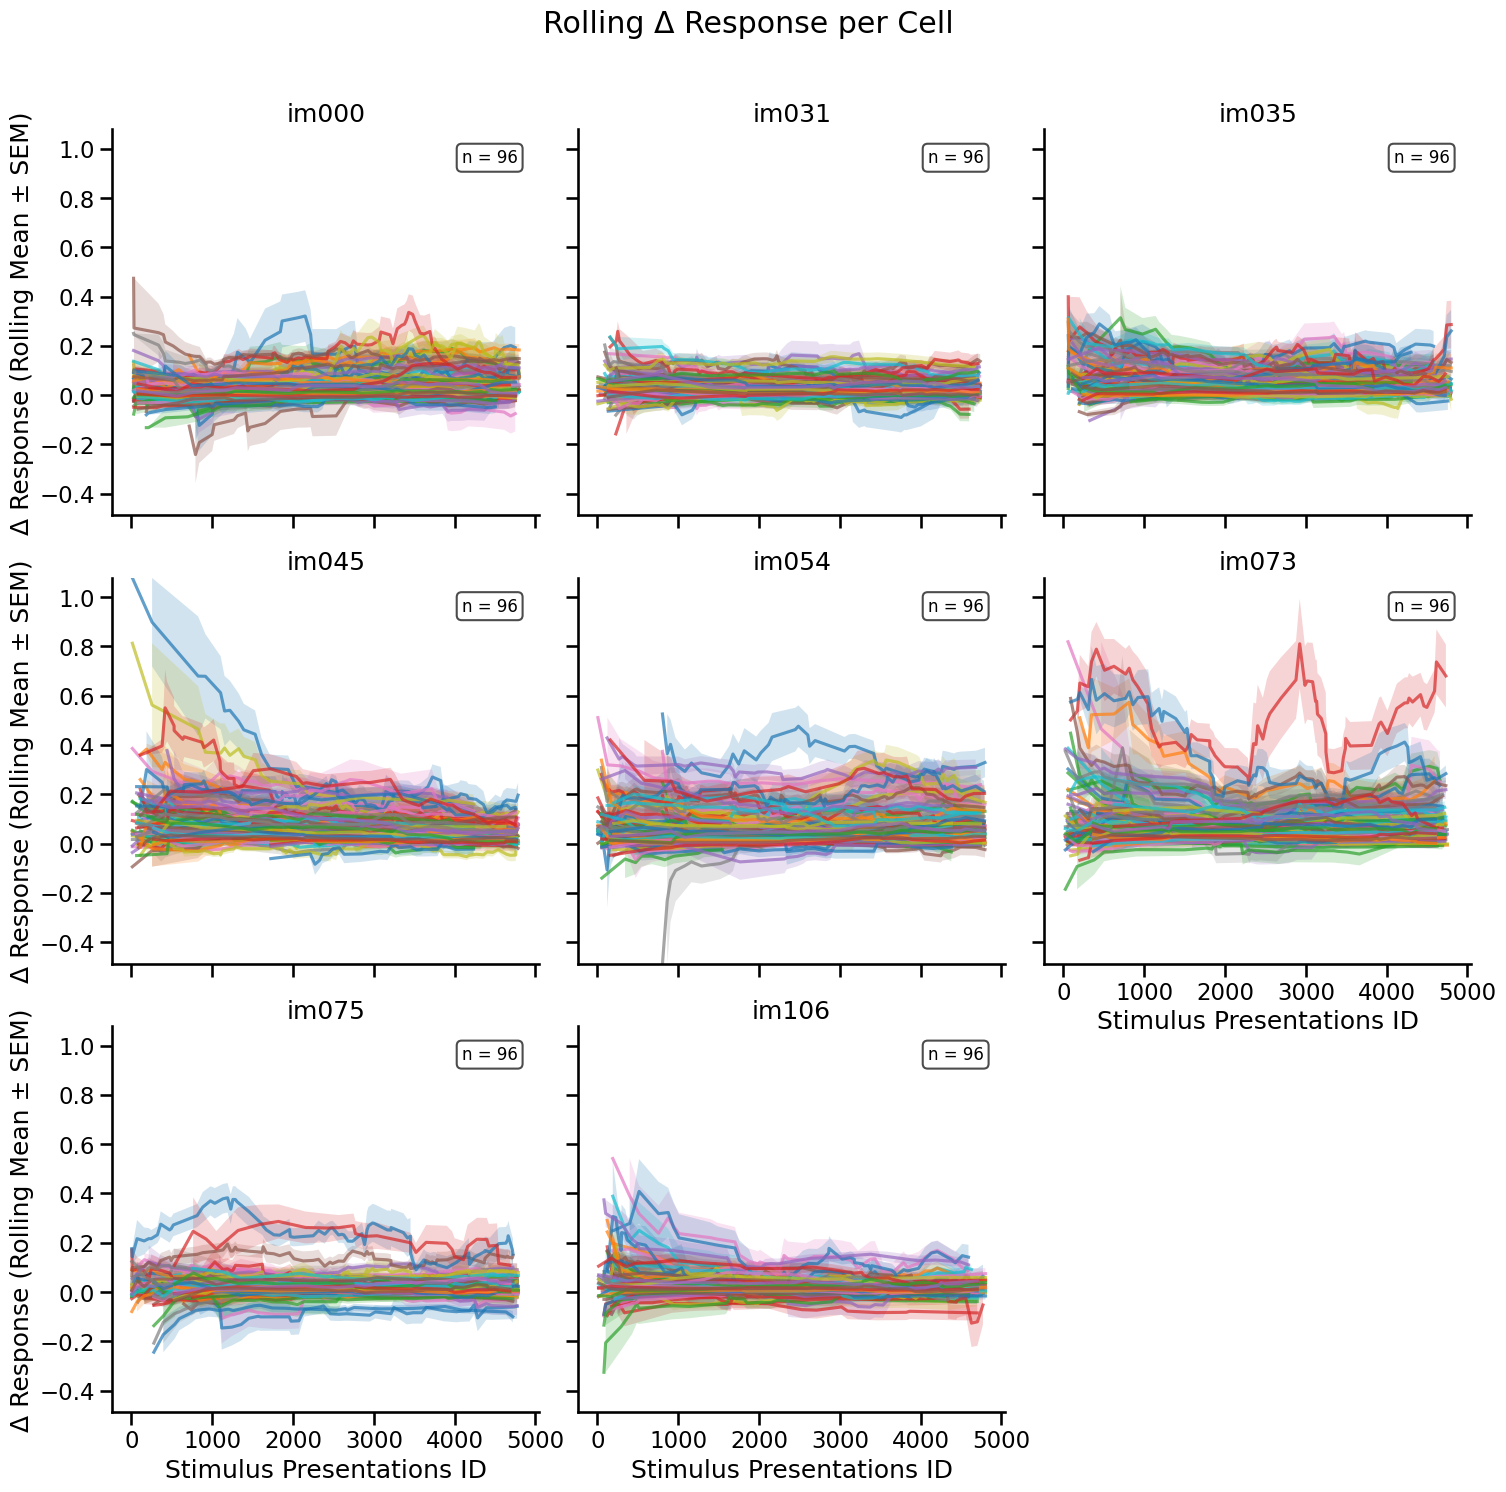

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Calculate delta response
sst_data_2['delta_response'] = sst_data_2['mean_response'] - sst_data_2['baseline_response']

# Step 2: Sort for consistent ordering
sst_data_2 = sst_data_2.sort_values(['image_name', 'cell_specimen_id', 'stimulus_presentations_id'])

# Step 3: Compute rolling stats per image + cell, based on actual stimulus IDs
def rolling_cell_stats(df, window=10):
    df = df.copy()
    df['rolling_mean'] = df['delta_response'].rolling(window=window, min_periods=1).mean()
    df['rolling_sem'] = df['delta_response'].rolling(window=window, min_periods=1).apply(
        lambda x: x.std(ddof=1) / np.sqrt(len(x)), raw=False)
    return df

rolling_df = sst_data_2.groupby(['image_name', 'cell_specimen_id'], group_keys=False).apply(rolling_cell_stats)

# Calculate global y-axis limits
y_min = (rolling_df['rolling_mean'] - rolling_df['rolling_sem']).min()
y_max = (rolling_df['rolling_mean'] + rolling_df['rolling_sem']).max()

# Count unique cells per image_name
cell_counts = rolling_df.groupby('image_name')['cell_specimen_id'].nunique()

# Step 4: Plot using stimulus_presentations_id as x-axis with shared y-axis limits
g = sns.FacetGrid(rolling_df, col="image_name", col_wrap=3, height=5, sharey=True)

def plot_cells(data, color, **kwargs):
    for cell_id, df_cell in data.groupby('cell_specimen_id'):
        x = df_cell['stimulus_presentations_id']
        y = df_cell['rolling_mean']
        sem = df_cell['rolling_sem']
        plt.plot(x, y, label=cell_id, alpha=0.7)
        plt.fill_between(x, y - sem, y + sem, alpha=0.2)

g.map_dataframe(plot_cells)

# Set y-axis limits and add n= count text
for ax, (image_name, n_cells) in zip(g.axes.flatten(), cell_counts.items()):
    ax.set_ylim(y_min, y_max)
    # Add text at upper right corner inside the plot
    ax.text(
        0.95, 0.95, f'n = {n_cells}',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
    )

# Optional: legend (commented out to avoid clutter)
#g.axes[0].legend(title='Cell ID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Final touches
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Stimulus Presentations ID", "Δ Response (Rolling Mean ± SEM)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Rolling Δ Response per Cell")
plt.show()

/tmp/ipython-input-32-3554225778.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_cell = cell_df.groupby('image_name', group_keys=False).apply(rolling_stats)
/tmp/ipython-input-32-3554225778.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rolling_cell = cell_df.groupby('image_name', group_keys=False).apply(rolling_stats)
/tmp/ipython-input-32-3554225778.py:33: DeprecationWarning: DataFrameG

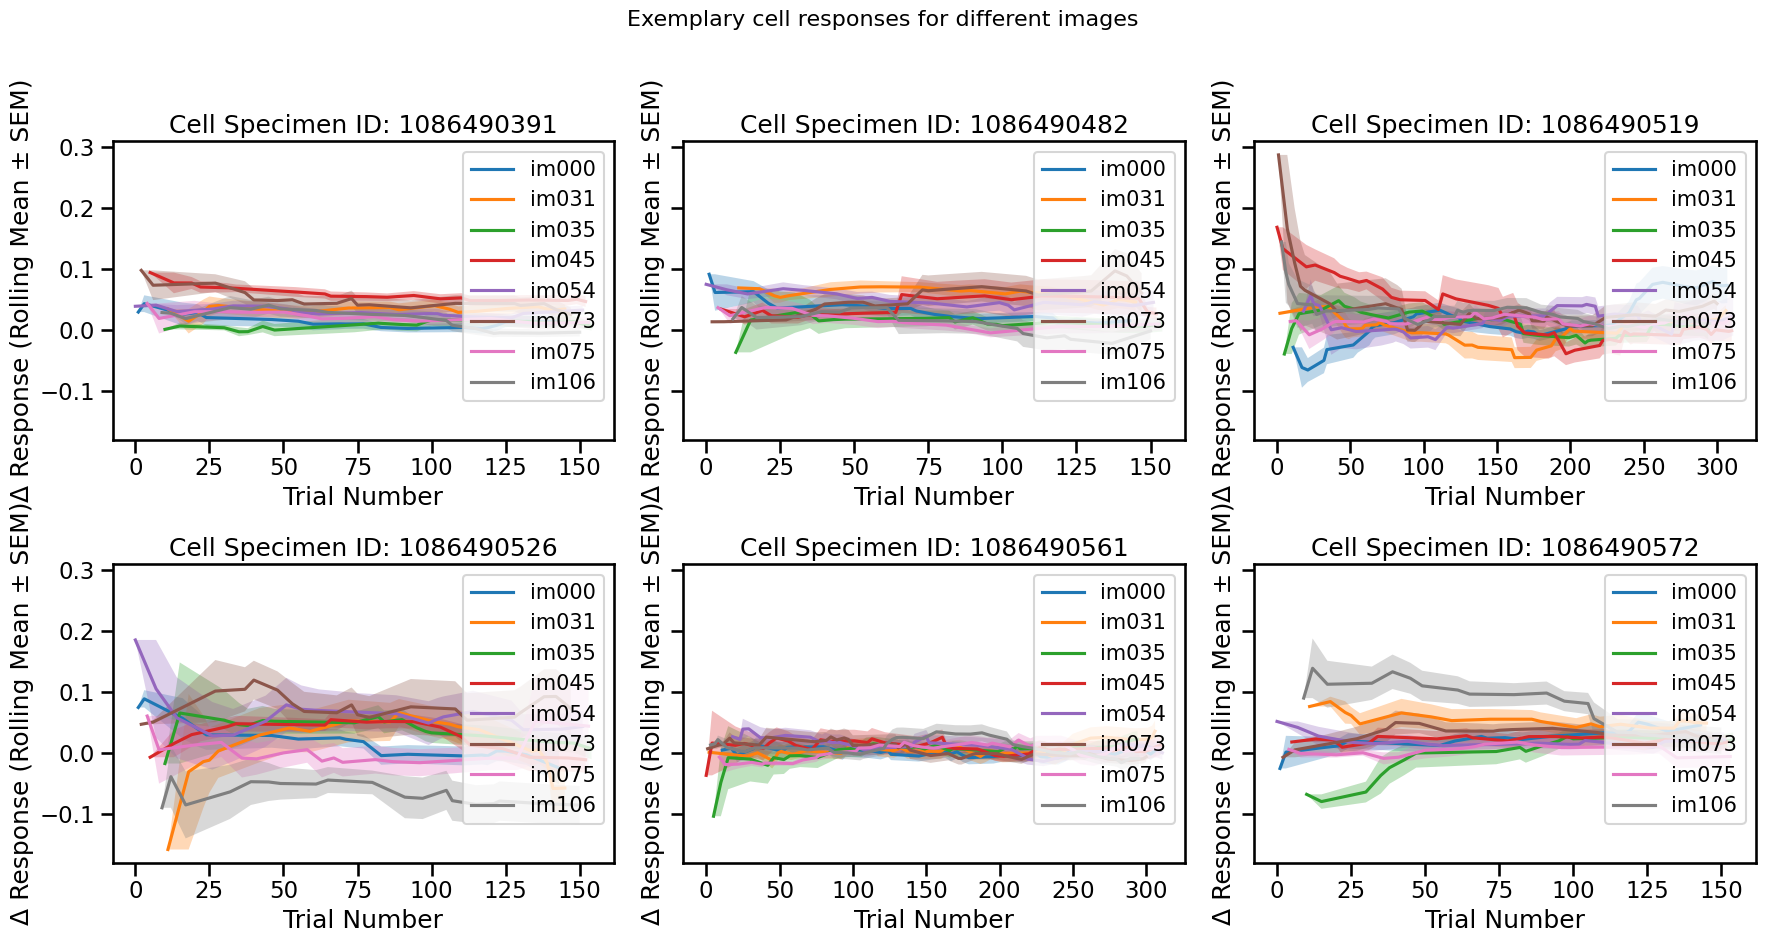

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 0: ensure delta_response exists
sst_data_2['delta_response'] = sst_data_2['mean_response'] - sst_data_2['baseline_response']

# Step 1: Sort and assign global trial_number per cell
sst_data_2 = sst_data_2.sort_values(['cell_specimen_id', 'stimulus_presentations_id'])
sst_data_2['trial_number'] = sst_data_2.groupby('cell_specimen_id').cumcount()

# Step 2: Pick first 6 cells
first_6_cells = sst_data_2['cell_specimen_id'].unique()[:6]

# Step 3: Rolling stats function (no local trial index)
def rolling_stats(df, window=10):
    df = df.copy()
    df['rolling_mean'] = df['delta_response'].rolling(window=window, min_periods=1).mean()
    df['rolling_sem'] = df['delta_response'].rolling(window=window, min_periods=1).apply(
        lambda x: x.std(ddof=1)/np.sqrt(len(x)) if len(x)>1 else 0,
        raw=False
    )
    return df

# Step 4: Plot
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for ax, cell_id in zip(axes, first_6_cells):
    cell_df = sst_data_2[sst_data_2['cell_specimen_id'] == cell_id]

    # Compute rolling stats per image
    rolling_cell = cell_df.groupby('image_name', group_keys=False).apply(rolling_stats)

    # Plot each image
    for image_name, df_img in rolling_cell.groupby('image_name'):
        ax.plot(df_img['trial_number'], df_img['rolling_mean'], label=image_name)
        ax.fill_between(
            df_img['trial_number'],
            df_img['rolling_mean'] - df_img['rolling_sem'],
            df_img['rolling_mean'] + df_img['rolling_sem'],
            alpha=0.3
        )

    ax.set_title(f'Cell Specimen ID: {cell_id}')
    ax.set_xlabel('Trial Number')
    ax.set_ylabel('Δ Response (Rolling Mean ± SEM)')
    ax.legend(fontsize='small', loc='upper right')

plt.suptitle('Exemplary cell responses for different images', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/tmp/ipython-input-33-988506074.py:202: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=metrics_df,
/tmp/ipython-input-33-988506074.py:202: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=metrics_df,
/tmp/ipython-input-33-988506074.py:202: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.pointplot(data=metrics_df,


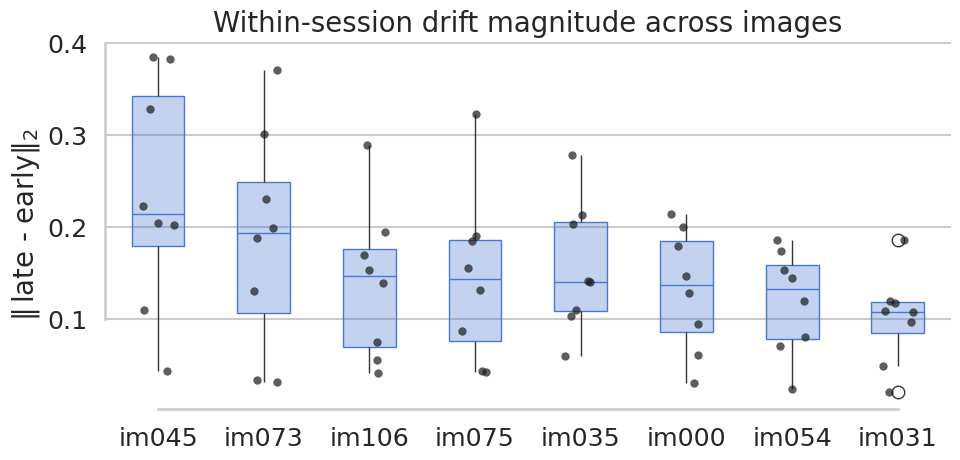

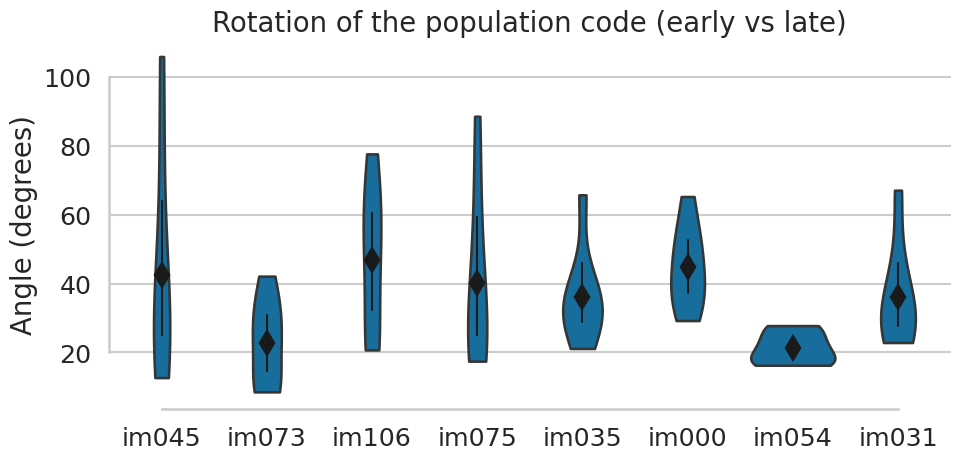

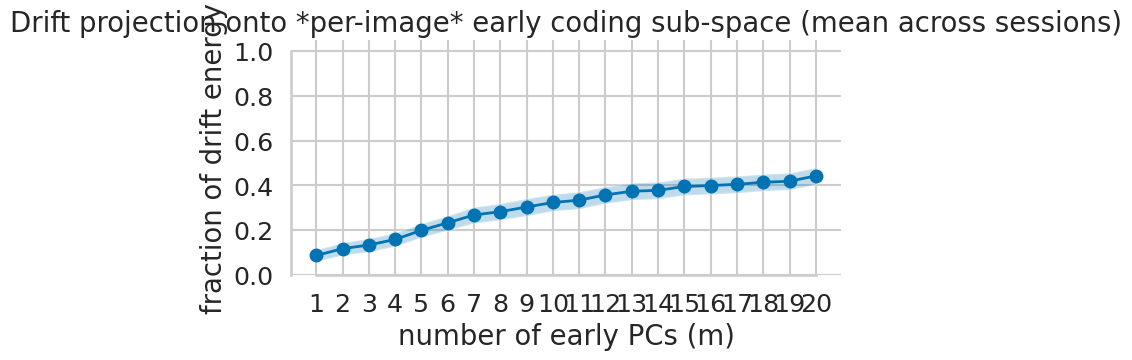

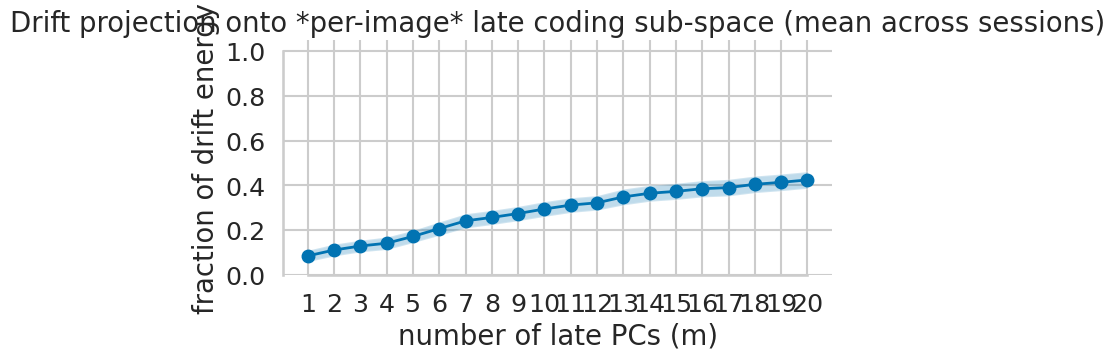

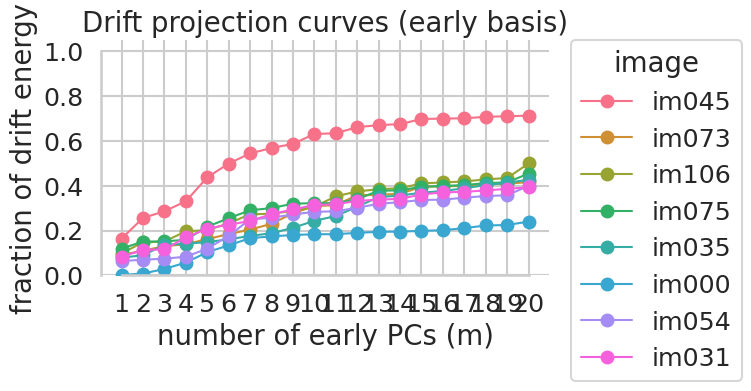

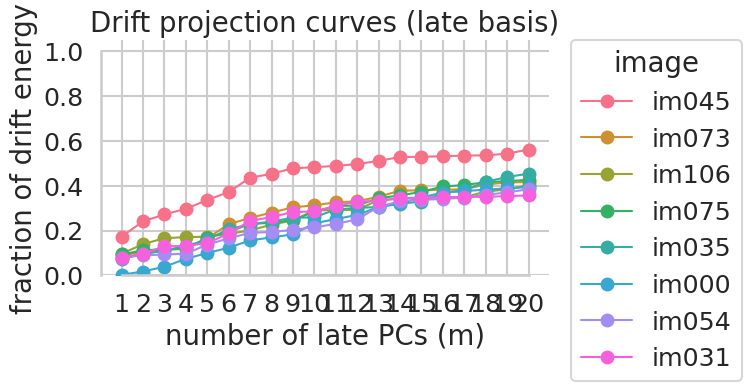

64 (session, image) pairs with both early & late.
metrics_df shape: (64, 44)
metrics_df columns: ['ophys_session_id', 'image_name', 'magnitude', 'angle_deg', 'proj_energy_early_pc1', 'proj_energy_late_pc1', 'proj_energy_early_pc2', 'proj_energy_late_pc2', 'proj_energy_early_pc3', 'proj_energy_late_pc3', 'proj_energy_early_pc4', 'proj_energy_late_pc4', 'proj_energy_early_pc5', 'proj_energy_late_pc5', 'proj_energy_early_pc6', 'proj_energy_late_pc6', 'proj_energy_early_pc7', 'proj_energy_late_pc7', 'proj_energy_early_pc8', 'proj_energy_late_pc8', 'proj_energy_early_pc9', 'proj_energy_late_pc9', 'proj_energy_early_pc10', 'proj_energy_late_pc10', 'proj_energy_early_pc11', 'proj_energy_late_pc11', 'proj_energy_early_pc12', 'proj_energy_late_pc12', 'proj_energy_early_pc13', 'proj_energy_late_pc13', 'proj_energy_early_pc14', 'proj_energy_late_pc14', 'proj_energy_early_pc15', 'proj_energy_late_pc15', 'proj_energy_early_pc16', 'proj_energy_late_pc16', 'proj_energy_early_pc17', 'proj_energy_late_

In [ ]:
# ===============================================================
# Session-quartile population drift analysis (early 25%, late 25%)
# PCA FIT SEPARATELY PER IMAGE FOR V1
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# 1. Δ response for every cell on every presentation
# ---------------------------------------------------------------
sst_data_2 = sst_data_2.copy()
sst_data_2["delta_response"] = (
    sst_data_2["mean_response"] - sst_data_2["baseline_response"]
)

# ---------------------------------------------------------------
# 2. Session-level quartile block labels (early = first 25%, late = last 25%)
#    Safeguard: ensure ≥1 trial per block even for very short sessions.
#    (To use pure fractional rule, see commented block below.)
# ---------------------------------------------------------------
sst_data_2 = sst_data_2.sort_values(
    ["ophys_session_id", "stimulus_presentations_id"]
)

# Index within session
sst_data_2["sess_trial_idx"] = (
    sst_data_2.groupby("ophys_session_id").cumcount()
)

# Session length (N presentations)
sess_n = (
    sst_data_2.groupby("ophys_session_id")["sess_trial_idx"]
              .transform("size")
)

# Integer cutpoints with minimum 1
early_cut  = np.maximum(1, np.floor(0.25 * sess_n).astype(int))          # count of early trials
late_start = sess_n - np.maximum(1, np.ceil(0.25 * sess_n).astype(int))   # first index of late block

sst_data_2["block"] = np.where(
    sst_data_2["sess_trial_idx"] < early_cut, "early",
    np.where(sst_data_2["sess_trial_idx"] >= late_start, "late", "middle")
)

# ---------------------------------------------------------------
# 3. Build FULL-length population vectors (only cells seen in BOTH early & late)
# ---------------------------------------------------------------
global_cells = np.sort(sst_data_2["cell_specimen_id"].unique())
cell2idx     = {cid: i for i, cid in enumerate(global_cells)}
n_cells      = len(global_cells)

pop_vectors = {}   # key = (session, image_name, block) -> np.array[n_cells]

for (sess, img), df_img in sst_data_2.groupby(["ophys_session_id", "image_name"]):
    df_el = df_img[df_img["block"].isin(["early", "late"])]
    if df_el["block"].nunique() < 2:
        continue  # need both early & late for this image in this session

    # cells recorded in *both* blocks
    cells_in_both = (
        df_el.groupby("cell_specimen_id")["block"]
             .nunique()
             .loc[lambda s: s == 2]
             .index
    )
    if len(cells_in_both) == 0:
        continue

    df_el = df_el[df_el["cell_specimen_id"].isin(cells_in_both)]

    for blk, df_blk in df_el.groupby("block"):
        vec = np.zeros(n_cells, dtype=np.float32)
        means = df_blk.groupby("cell_specimen_id")["delta_response"].mean()
        vec[[cell2idx[c] for c in means.index]] = means.to_numpy()
        pop_vectors[(sess, img, blk)] = vec

# ---------------------------------------------------------------
# 4. Drift metrics (magnitude, angle) & collect valid (session,image) pairs
# ---------------------------------------------------------------
results = []

pairs = sorted({(k[0], k[1]) for k in pop_vectors.keys()
                if (k[0], k[1], "early") in pop_vectors
                and (k[0], k[1], "late")  in pop_vectors})

if len(pairs) == 0:
    raise RuntimeError(
        "No (session, image) pairs have both early and late data after 25% trimming. "
        "Check block counts or loosen inclusion criteria."
    )

for (sess, img) in pairs:
    v_early = pop_vectors[(sess, img, "early")]
    v_late  = pop_vectors[(sess, img, "late")]
    drift   = v_late - v_early

    mag   = np.linalg.norm(drift)
    denom = np.linalg.norm(v_early) * np.linalg.norm(v_late)
    cosang = np.clip((v_early @ v_late) / denom if denom else 1.0, -1, 1)
    angle  = np.degrees(np.arccos(cosang))

    results.append({
        "ophys_session_id": sess,
        "image_name": img,
        "magnitude": mag,
        "angle_deg": angle,
    })

metrics_df = pd.DataFrame(results)

# ---------------------------------------------------------------
# 4b. GLOBAL PCA bases across images (works with single session)
# ---------------------------------------------------------------
MAX_PC = 20

# collect early & late population vectors (one per (session,image) pair)
early_mat = []
late_mat  = []
for (sess, img) in pairs:
    early_mat.append(pop_vectors[(sess, img, "early")])
    late_mat.append(pop_vectors[(sess, img, "late")])

X_early = np.vstack(early_mat)               # [n_images, n_cells] if 1 session
X_late  = np.vstack(late_mat)

n_pc_e  = min(MAX_PC, X_early.shape[0], X_early.shape[1])
n_pc_l  = min(MAX_PC, X_late.shape[0],  X_late.shape[1])

pca_e = PCA(n_components=n_pc_e).fit(X_early)
pca_l = PCA(n_components=n_pc_l).fit(X_late)
P_e   = pca_e.components_.T                  # [cells, n_pc_e]
P_l   = pca_l.components_.T                  # [cells, n_pc_l]

# precreate columns
for m in range(1, MAX_PC + 1):
    metrics_df[f"proj_energy_early_pc{m}"] = np.nan
    metrics_df[f"proj_energy_late_pc{m}"]  = np.nan

# fill drift projection energy
for idx, row in metrics_df.iterrows():
    s = row["ophys_session_id"]
    img = row["image_name"]
    v_e = pop_vectors[(s, img, "early")]
    v_l = pop_vectors[(s, img, "late")]
    drift = v_l - v_e
    de = np.sum(drift**2)
    if de == 0:
        continue

    proj_e = drift @ P_e
    cum_e  = np.cumsum(proj_e**2)
    for m in range(1, n_pc_e + 1):
        metrics_df.at[idx, f"proj_energy_early_pc{m}"] = cum_e[m-1] / de

    proj_l = drift @ P_l
    cum_l  = np.cumsum(proj_l**2)
    for m in range(1, n_pc_l + 1):
        metrics_df.at[idx, f"proj_energy_late_pc{m}"] = cum_l[m-1] / de

# ---------------------------------------------------------------
# 5. Visualisation
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid",
              context="talk",
              font_scale=1.1,
              palette="colorblind")

# order images by median drift magnitude
image_order = (metrics_df.groupby("image_name")["magnitude"]
                          .median()
                          .sort_values(ascending=False)
                          .index.tolist())

# --- Drift magnitude: box + scatter ---
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=metrics_df,
            x="image_name", y="magnitude",
            order=image_order,
            width=.5, showcaps=False,
            boxprops={'facecolor': '#4878CF55', 'edgecolor': '#4878CF'},
            medianprops={'color': '#4878CF'},
            ax=ax)
sns.stripplot(data=metrics_df,
              x="image_name", y="magnitude",
              order=image_order,
              size=6, jitter=0.15, color='k', alpha=.7, ax=ax)
ax.set_ylabel(r"$\|\,$late - early$\|_2$")
ax.set_xlabel("")
ax.set_title("Within-session drift magnitude across images")
sns.despine(trim=True)
fig.tight_layout()

# --- Drift angle: violin + mean ±95% CI ---
fig, ax = plt.subplots(figsize=(10, 5))
sns.violinplot(data=metrics_df,
               x="image_name", y="angle_deg",
               order=image_order, cut=0, inner=None, ax=ax)
sns.pointplot(data=metrics_df,
              x="image_name", y="angle_deg",
              order=image_order,
              ci=95, join=False, color='k',
              markers='d', errwidth=1.5, ax=ax)
ax.set_ylabel("Angle (degrees)")
ax.set_xlabel("")
ax.set_title("Rotation of the population code (early vs late)")
sns.despine(trim=True)
fig.tight_layout()

# --- Drift projection curve: early PC basis (per-image PCs; aggregated) ---
proj_cols_e = [c for c in metrics_df.columns if c.startswith("proj_energy_early_pc")]
proj_mat_e  = metrics_df[proj_cols_e].to_numpy(dtype=float)  # [pairs, m]
m_vals_e    = np.arange(1, proj_mat_e.shape[1] + 1)

mean_e = np.nanmean(proj_mat_e, axis=0)
n_eff_e = np.sum(~np.isnan(proj_mat_e), axis=0)
sem_e  = np.nanstd(proj_mat_e, axis=0, ddof=1) / np.sqrt(n_eff_e)

fig, ax = plt.subplots(figsize=(7, 4))
ax.fill_between(m_vals_e, mean_e - sem_e, mean_e + sem_e, alpha=.25)
ax.plot(m_vals_e, mean_e, marker='o', linewidth=2)
ax.set_ylim(0, 1.05)
ax.set_xticks(m_vals_e)
ax.set_xlabel("number of early PCs (m)")
ax.set_ylabel("fraction of drift energy")
ax.set_title("Drift projection onto *per-image* early coding sub-space (mean across sessions)")
sns.despine(trim=True)
fig.tight_layout()

# --- Drift projection curve: late PC basis (per-image PCs; aggregated) ---
proj_cols_l = [c for c in metrics_df.columns if c.startswith("proj_energy_late_pc")]
proj_mat_l  = metrics_df[proj_cols_l].to_numpy(dtype=float)
m_vals_l    = np.arange(1, proj_mat_l.shape[1] + 1)

mean_l = np.nanmean(proj_mat_l, axis=0)
n_eff_l = np.sum(~np.isnan(proj_mat_l), axis=0)
sem_l  = np.nanstd(proj_mat_l, axis=0, ddof=1) / np.sqrt(n_eff_l)

fig, ax = plt.subplots(figsize=(7, 4))
ax.fill_between(m_vals_l, mean_l - sem_l, mean_l + sem_l, alpha=.25)
ax.plot(m_vals_l, mean_l, marker='o', linewidth=2)
ax.set_ylim(0, 1.05)
ax.set_xticks(m_vals_l)
ax.set_xlabel("number of late PCs (m)")
ax.set_ylabel("fraction of drift energy")
ax.set_title("Drift projection onto *per-image* late coding sub-space (mean across sessions)")
sns.despine(trim=True)
fig.tight_layout()

# ---------------------------------------------------------------
# 5b. Per-image drift projection curves (EARLY basis; colored lines)
# ---------------------------------------------------------------
palette_e = sns.color_palette("husl", n_colors=len(image_order))
img2color_e = dict(zip(image_order, palette_e))

fig, ax = plt.subplots(figsize=(8, 4))
for img in image_order:
    df_i = metrics_df.loc[metrics_df["image_name"] == img, proj_cols_e]
    if df_i.empty:
        continue
    vals = np.nanmean(df_i.to_numpy(dtype=float), axis=0)
    valid = ~np.isnan(vals)
    if not valid.any():
        continue
    m_vals = m_vals_e[valid]
    ax.plot(m_vals, vals[valid], marker='o', linewidth=1.5,
            label=img, color=img2color_e[img])

ax.set_ylim(0, 1.05)
ax.set_xticks(range(1, len(proj_cols_e) + 1))
ax.set_xlabel("number of early PCs (m)")
ax.set_ylabel("fraction of drift energy")
ax.set_title("Drift projection curves (early basis)")
sns.despine(trim=True)
ax.legend(title="image", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
fig.tight_layout()

# ---------------------------------------------------------------
# 5c. Per-image drift projection curves (LATE basis; colored lines)
# ---------------------------------------------------------------
# reuse same colors so image colors match across plots
fig, ax = plt.subplots(figsize=(8, 4))
for img in image_order:
    df_i = metrics_df.loc[metrics_df["image_name"] == img, proj_cols_l]
    if df_i.empty:
        continue
    vals = np.nanmean(df_i.to_numpy(dtype=float), axis=0)
    valid = ~np.isnan(vals)
    if not valid.any():
        continue
    m_vals = m_vals_l[valid]
    ax.plot(m_vals, vals[valid], marker='o', linewidth=1.5,
            label=img, color=img2color_e[img])  # same color map

ax.set_ylim(0, 1.05)
ax.set_xticks(range(1, len(proj_cols_l) + 1))
ax.set_xlabel("number of late PCs (m)")
ax.set_ylabel("fraction of drift energy")
ax.set_title("Drift projection curves (late basis)")
sns.despine(trim=True)
ax.legend(title="image", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
fig.tight_layout()

# ---------------------------------------------------------------
# Show all figures
# ---------------------------------------------------------------
plt.show()

# ---------------------------------------------------------------
# (Optional) quick sanity printouts
# ---------------------------------------------------------------
print(f"{len(pairs)} (session, image) pairs with both early & late.")
print("metrics_df shape:", metrics_df.shape)
print("metrics_df columns:", metrics_df.columns.tolist())

Available mice/sessions: [ 957189583  979379271  985610440  992783847  994199725  994731371
 1001860744 1010684546]
Images present for mouse 957189583: ['im045' 'im073' 'im031' 'im106' 'im035' 'im075' 'im000' 'im054']
Mouse 957189583, image 'im045': 18 cells; 11 early trials; 11 late trials.
Drift magnitude: 0.336; angle: 20.57°.

metrics_df:
    ophys_session_id image_name  magnitude  angle_deg  n_cells  n_trials_early  \
0         957189583      im045   0.335526  20.566093       18              11   

   n_trials_late  proj_energy_early_pc1  proj_energy_early_pc2  \
0             11               0.871769               0.900089   

   proj_energy_early_pc3  ...  proj_energy_late_pc11  proj_energy_late_pc12  \
0               0.924749  ...                0.79782                    NaN   

   proj_energy_late_pc13  proj_energy_late_pc14  proj_energy_late_pc15  \
0                    NaN                    NaN                    NaN   

   proj_energy_late_pc16  proj_energy_late_pc17  p

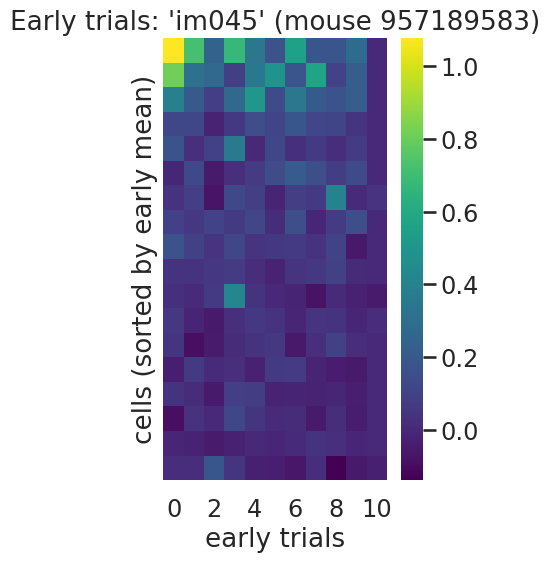

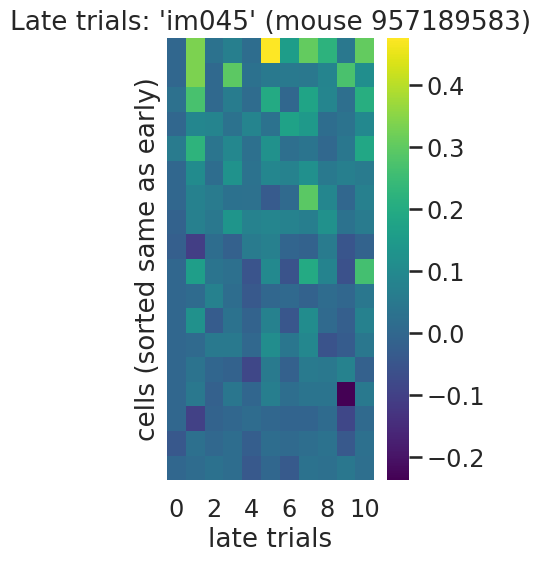

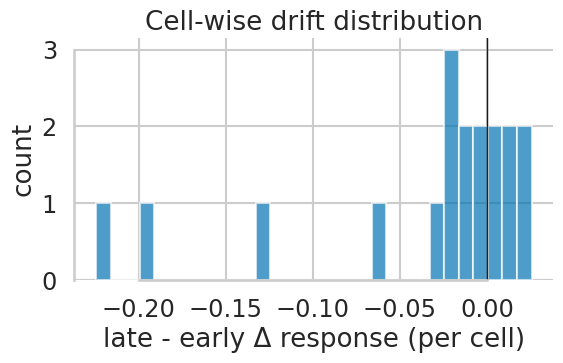

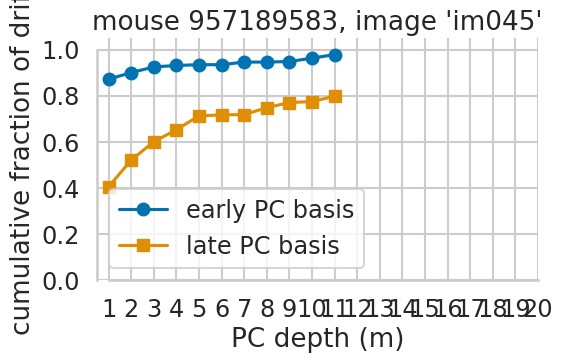

In [ ]:
# ===============================================================
# Single mouse + single image drift (early 25% vs late 25%)
# Population matrices: rows=cells, cols=trials
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# User choices
# ---------------------------------------------------------------
SESSION_COL   = "ophys_session_id"
EARLY_FRAC    = 0.25
LATE_FRAC     = 0.25
MAX_PC        = 20
MIN_TRIALS_PC = 2   # need >=2 trials to fit PCA
MOUSE_ID      = 957189583    # <-- SET THIS (e.g., 957189583). If None, first shown will be used.
IMAGE_NAME    = 'im045'    # <-- SET or leave None to auto-detect (must be unique in chosen mouse)

# ---------------------------------------------------------------
# 1. Inspect available mice & images
# ---------------------------------------------------------------
all_sessions = sst_data_2[SESSION_COL].unique()
print("Available mice/sessions:", all_sessions)

if MOUSE_ID is None:
    MOUSE_ID = all_sessions[0]
    print(f"No MOUSE_ID set; using first: {MOUSE_ID}")
elif MOUSE_ID not in all_sessions:
    raise ValueError(f"MOUSE_ID {MOUSE_ID} not found. Pick from: {all_sessions}.")

# filter to chosen mouse
sst_mouse = sst_data_2[sst_data_2[SESSION_COL] == MOUSE_ID].copy()

# what images exist in this mouse?
imgs_mouse = sst_mouse["image_name"].unique()
print(f"Images present for mouse {MOUSE_ID}: {imgs_mouse}")

if IMAGE_NAME is None:
    if len(imgs_mouse) == 1:
        IMAGE_NAME = imgs_mouse[0]
        print(f"Auto-selecting sole image: {IMAGE_NAME}")
    else:
        raise ValueError(
            f"Multiple images ({len(imgs_mouse)}) for mouse {MOUSE_ID}. "
            f"Set IMAGE_NAME explicitly from: {imgs_mouse}"
        )
else:
    if IMAGE_NAME not in imgs_mouse:
        raise ValueError(f"IMAGE_NAME '{IMAGE_NAME}' not found for mouse {MOUSE_ID}.")

# filter to chosen image
sst_df = sst_mouse[sst_mouse["image_name"] == IMAGE_NAME].copy()

# ---------------------------------------------------------------
# 2. Δ response
# ---------------------------------------------------------------
sst_df["delta_response"] = sst_df["mean_response"] - sst_df["baseline_response"]

# ---------------------------------------------------------------
# 3. Label early / late along this mouse’s full presentation timeline
# ---------------------------------------------------------------
sst_df = sst_df.sort_values("stimulus_presentations_id")
sst_df["sess_trial_idx"] = np.arange(len(sst_df))

N = len(sst_df)
early_cut  = max(1, int(np.floor(EARLY_FRAC * N)))
late_start = N - max(1, int(np.ceil(LATE_FRAC * N)))

sst_df["block"] = np.where(
    sst_df["sess_trial_idx"] < early_cut, "early",
    np.where(sst_df["sess_trial_idx"] >= late_start, "late", "middle")
)

# ---------------------------------------------------------------
# 4. Helper: build cell×trial matrix for early or late block
# ---------------------------------------------------------------
def cell_trial_matrix(df, block):
    """Return (M, cells, trial_ids) for selected image & block."""
    d = df[df["block"] == block]
    if d.empty:
        return None, None, None
    d = d.sort_values("stimulus_presentations_id")
    M = d.pivot_table(index="cell_specimen_id",
                      columns="stimulus_presentations_id",
                      values="delta_response",
                      aggfunc="mean")
    # clean
    M = M.dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(0.0)
    cells  = M.index.to_numpy()
    trials = M.columns.to_numpy()
    return M.to_numpy(dtype=float), cells, trials

# ---------------------------------------------------------------
# 5. Build early / late matrices
# ---------------------------------------------------------------
M_e, cells_e, tr_e = cell_trial_matrix(sst_df, "early")
M_l, cells_l, tr_l = cell_trial_matrix(sst_df, "late")

if M_e is None or M_l is None:
    raise RuntimeError("Need both early and late trials.")

# intersect cells present in both blocks
cells_both = np.intersect1d(cells_e, cells_l, assume_unique=False)
if cells_both.size == 0:
    raise RuntimeError("No overlapping cells across early & late blocks.")

# align matrices to intersected cells
df_e = pd.DataFrame(M_e, index=cells_e, columns=tr_e).loc[cells_both].fillna(0.0)
df_l = pd.DataFrame(M_l, index=cells_l, columns=tr_l).loc[cells_both].fillna(0.0)

M_e = df_e.to_numpy(dtype=float)   # cells × early trials
M_l = df_l.to_numpy(dtype=float)   # cells × late  trials

n_cells = M_e.shape[0]
n_tr_e  = M_e.shape[1]
n_tr_l  = M_l.shape[1]

print(f"Mouse {MOUSE_ID}, image '{IMAGE_NAME}': {n_cells} cells; "
      f"{n_tr_e} early trials; {n_tr_l} late trials.")

# ---------------------------------------------------------------
# 6. Block means & drift
# ---------------------------------------------------------------
v_e = np.mean(M_e, axis=1)
v_l = np.mean(M_l, axis=1)
drift = v_l - v_e

mag = np.linalg.norm(drift)
denom = np.linalg.norm(v_e) * np.linalg.norm(v_l)
cosang = np.clip((v_e @ v_l) / denom if denom else 1.0, -1, 1)
angle = np.degrees(np.arccos(cosang))
print(f"Drift magnitude: {mag:.3g}; angle: {angle:.2f}°.")

# ---------------------------------------------------------------
# 7. PCA (trials as samples; cells as features)
# ---------------------------------------------------------------
pcs_e = pcs_l = None
ne = nl = 0

if n_tr_e >= MIN_TRIALS_PC:
    ne = min(MAX_PC, n_tr_e, n_cells)
    pca_e = PCA(n_components=ne).fit(M_e.T)   # (trials, cells)
    pcs_e = pca_e.components_.T               # (cells, ne)
else:
    print("Skipping early PCA (insufficient trials).")

if n_tr_l >= MIN_TRIALS_PC:
    nl = min(MAX_PC, n_tr_l, n_cells)
    pca_l = PCA(n_components=nl).fit(M_l.T)
    pcs_l = pca_l.components_.T               # (cells, nl)
else:
    print("Skipping late PCA (insufficient trials).")

# ---------------------------------------------------------------
# 8. Project drift into early / late PC bases
# ---------------------------------------------------------------
drift_energy = np.sum(drift**2)
proj_energy_early = np.full(MAX_PC, np.nan)
proj_energy_late  = np.full(MAX_PC, np.nan)

if drift_energy > 0:
    if pcs_e is not None:
        proj = drift @ pcs_e
        cum  = np.cumsum(proj**2) / drift_energy
        proj_energy_early[:ne] = cum
    if pcs_l is not None:
        proj = drift @ pcs_l
        cum  = np.cumsum(proj**2) / drift_energy
        proj_energy_late[:nl] = cum

# ---------------------------------------------------------------
# 9. Single-row metrics_df
# ---------------------------------------------------------------
metrics_df = pd.DataFrame([{
    SESSION_COL: MOUSE_ID,
    "image_name": IMAGE_NAME,
    "magnitude": mag,
    "angle_deg": angle,
    "n_cells": n_cells,
    "n_trials_early": n_tr_e,
    "n_trials_late": n_tr_l,
    **{f"proj_energy_early_pc{m+1}": proj_energy_early[m] for m in range(MAX_PC)},
    **{f"proj_energy_late_pc{m+1}":  proj_energy_late[m]  for m in range(MAX_PC)},
}])

print("\nmetrics_df:\n", metrics_df.head())

# ---------------------------------------------------------------
# 10. Visualizations
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid", context="talk", font_scale=1.05, palette="colorblind")

# sort cells by early mean
sort_idx = np.argsort(v_e)[::-1]
M_e_sorted = M_e[sort_idx]
M_l_sorted = M_l[sort_idx]

# Early heatmap
fig, ax = plt.subplots(figsize=(max(4, n_tr_e*0.25), max(6, n_cells*0.02)))
sns.heatmap(M_e_sorted, cmap="viridis", cbar=True, ax=ax)
ax.set_title(f"Early trials: '{IMAGE_NAME}' (mouse {MOUSE_ID})")
ax.set_ylabel("cells (sorted by early mean)")
ax.set_xlabel("early trials")
ax.set_yticks([])
fig.tight_layout()

# Late heatmap
fig, ax = plt.subplots(figsize=(max(4, n_tr_l*0.25), max(6, n_cells*0.02)))
sns.heatmap(M_l_sorted, cmap="viridis", cbar=True, ax=ax)
ax.set_title(f"Late trials: '{IMAGE_NAME}' (mouse {MOUSE_ID})")
ax.set_ylabel("cells (sorted same as early)")
ax.set_xlabel("late trials")
ax.set_yticks([])
fig.tight_layout()

# Drift distribution
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(drift, bins=30, alpha=.7)
ax.axvline(0, color='k', linewidth=1)
ax.set_xlabel("late - early Δ response (per cell)")
ax.set_ylabel("count")
ax.set_title("Cell-wise drift distribution")
sns.despine(trim=True)
fig.tight_layout()

# Drift projection curves
m_vals = np.arange(1, MAX_PC + 1)
fig, ax = plt.subplots(figsize=(6, 4))
if not np.all(np.isnan(proj_energy_early)):
    ax.plot(m_vals, proj_energy_early, marker='o', label="early PC basis")
if not np.all(np.isnan(proj_energy_late)):
    ax.plot(m_vals, proj_energy_late, marker='s', label="late PC basis")
ax.set_ylim(0, 1.05)
ax.set_xticks(m_vals)
ax.set_xlabel("PC depth (m)")
ax.set_ylabel("cumulative fraction of drift")
ax.set_title(f"mouse {MOUSE_ID}, image '{IMAGE_NAME}'")
ax.legend()
sns.despine(trim=True)
fig.tight_layout()

plt.show()


Available mice/sessions: [ 957189583  979379271  985610440  992783847  994199725  994731371
 1001860744 1010684546]
Images present for mouse 957189583: ['im045' 'im073' 'im031' 'im106' 'im035' 'im075' 'im000' 'im054']
Mouse 957189583, image 'im045': 18 cells × 41 total trials (all blocks).
Drift mag=0.348 angle=20.18° (from block means; optional).


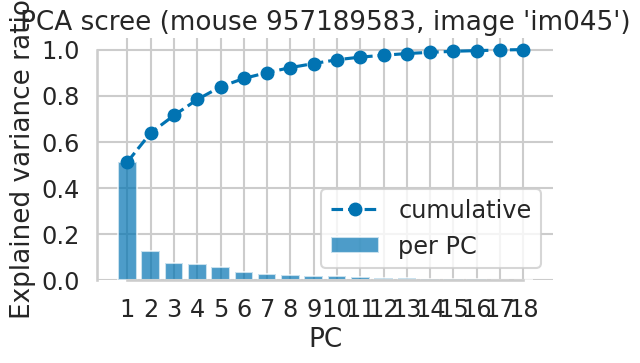

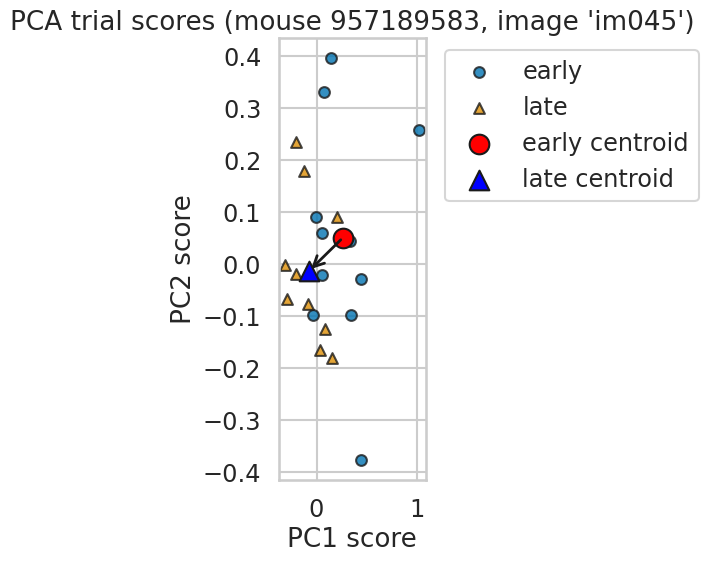

In [ ]:
# ===============================================================
# Single mouse + single image
# PCA of cell×trial responses (early + late + middle in common space)
# No drift-energy plots.
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# User choices
# ---------------------------------------------------------------
SESSION_COL   = "ophys_session_id"
EARLY_FRAC    = 0.25
LATE_FRAC     = 0.25
MAX_PC        = 20
MOUSE_ID      = 957189583      # e.g. 957189583
IMAGE_NAME    = 'im045'      # e.g. "im045"

# ---------------------------------------------------------------
# 1. Pick mouse & image
# ---------------------------------------------------------------
all_sessions = sst_data_2[SESSION_COL].unique()
print("Available mice/sessions:", all_sessions)

if MOUSE_ID is None:
    MOUSE_ID = all_sessions[0]
    print(f"No MOUSE_ID set; using first: {MOUSE_ID}")
elif MOUSE_ID not in all_sessions:
    raise ValueError(f"MOUSE_ID {MOUSE_ID} not found. Pick from: {all_sessions}.")

sst_mouse = sst_data_2[sst_data_2[SESSION_COL] == MOUSE_ID].copy()

imgs_mouse = sst_mouse["image_name"].unique()
print(f"Images present for mouse {MOUSE_ID}: {imgs_mouse}")

if IMAGE_NAME is None:
    if len(imgs_mouse) == 1:
        IMAGE_NAME = imgs_mouse[0]
        print(f"Auto-selecting sole image: {IMAGE_NAME}")
    else:
        raise ValueError(
            f"Multiple images for mouse {MOUSE_ID}. "
            f"Set IMAGE_NAME from: {imgs_mouse}"
        )
else:
    if IMAGE_NAME not in imgs_mouse:
        raise ValueError(f"IMAGE_NAME '{IMAGE_NAME}' not found for mouse {MOUSE_ID}.")

# filter to chosen image
sst_df = sst_mouse[sst_mouse["image_name"] == IMAGE_NAME].copy()

# ---------------------------------------------------------------
# 2. Δ response
# ---------------------------------------------------------------
sst_df["delta_response"] = sst_df["mean_response"] - sst_df["baseline_response"]

# ---------------------------------------------------------------
# 3. Early / late block labels across this mouse's full timeline
# ---------------------------------------------------------------
sst_df = sst_df.sort_values("stimulus_presentations_id")
sst_df["sess_trial_idx"] = np.arange(len(sst_df))

N = len(sst_df)
early_cut  = max(1, int(np.floor(EARLY_FRAC * N)))
late_start = N - max(1, int(np.ceil(LATE_FRAC * N)))

sst_df["block"] = np.where(
    sst_df["sess_trial_idx"] < early_cut, "early",
    np.where(sst_df["sess_trial_idx"] >= late_start, "late", "middle")
)

# ---------------------------------------------------------------
# 4. Build a single cell×trial matrix for *all* trials (early+late+middle)
# ---------------------------------------------------------------
M_all_df = sst_df.pivot_table(index="cell_specimen_id",
                              columns="stimulus_presentations_id",
                              values="delta_response",
                              aggfunc="mean")

# Drop empty rows/cols; fill NaNs
M_all_df = M_all_df.dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(0.0)

cells_all  = M_all_df.index.to_numpy()
trials_all = M_all_df.columns.to_numpy()
M_all      = M_all_df.to_numpy(dtype=float)   # (n_cells, n_trials_total)

n_cells = M_all.shape[0]
n_trials_total = M_all.shape[1]

print(f"Mouse {MOUSE_ID}, image '{IMAGE_NAME}': "
      f"{n_cells} cells × {n_trials_total} total trials (all blocks).")

# ---------------------------------------------------------------
# 5. Trial block labels aligned to pivot columns
#    ### FIX: unique trial→block map before reindex
# ---------------------------------------------------------------
trial_block_map = (
    sst_df[["stimulus_presentations_id", "block"]]
      .drop_duplicates(subset="stimulus_presentations_id")
      .set_index("stimulus_presentations_id")
      .reindex(trials_all)["block"]
      .fillna("unknown")
      .to_numpy()
)

is_early = (trial_block_map == "early")
is_late  = (trial_block_map == "late")
is_mid   = (trial_block_map == "middle")

# ---------------------------------------------------------------
# 6. Block means & drift (scalar summaries)
# ---------------------------------------------------------------
def block_mean_from_mask(M, mask):
    if not np.any(mask):
        return np.full(M.shape[0], np.nan)
    return np.mean(M[:, mask], axis=1)

v_e = block_mean_from_mask(M_all, is_early)
v_l = block_mean_from_mask(M_all, is_late)
drift = v_l - v_e

if np.any(~np.isnan(v_e)) and np.any(~np.isnan(v_l)):
    mag = np.linalg.norm(np.nan_to_num(drift))
    denom = np.linalg.norm(np.nan_to_num(v_e)) * np.linalg.norm(np.nan_to_num(v_l))
    cosang = np.clip((np.nan_to_num(v_e) @ np.nan_to_num(v_l)) / denom if denom else 1.0, -1, 1)
    angle = np.degrees(np.arccos(cosang))
else:
    mag = np.nan
    angle = np.nan

print(f"Drift mag={mag:.3g} angle={angle:.2f}° (from block means; optional).")

# ---------------------------------------------------------------
# 7. PCA on *all* trials (common embedding for early+late comparison)
# ---------------------------------------------------------------
n_components = min(MAX_PC, n_trials_total, n_cells)
pca_all = PCA(n_components=n_components).fit(M_all.T)  # samples=trials, feats=cells
scores_all = pca_all.transform(M_all.T)                # (n_trials_total, n_components)
loadings_all = pca_all.components_.T                   # (n_cells, n_components)
expl_var = pca_all.explained_variance_ratio_

# ---------------------------------------------------------------
# 8. Visualizations: PCA (NO drift-energy plots)
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid", context="talk", font_scale=1.05, palette="colorblind")

# --- 8a. Scree ---
fig, ax = plt.subplots(figsize=(6, 4))
x = np.arange(1, n_components+1)
ax.bar(x, expl_var, alpha=.7, label="per PC")
ax.plot(x, np.cumsum(expl_var), marker='o', linestyle='--', label='cumulative')
ax.set_xlabel("PC")
ax.set_ylabel("Explained variance ratio")
ax.set_title(f"PCA scree (mouse {MOUSE_ID}, image '{IMAGE_NAME}')")
ax.set_xticks(x)
ax.legend()
sns.despine(trim=True)
fig.tight_layout()

# --- 8b. PC1 vs PC2 scatter (color by block) ---
fig, ax = plt.subplots(figsize=(6, 6))
if n_components >= 2:
    # scatter each block
    ax.scatter(scores_all[is_early, 0], scores_all[is_early, 1], label="early",  alpha=.8, s=60, edgecolor='k')
    ax.scatter(scores_all[is_late, 0],  scores_all[is_late, 1],  label="late",   alpha=.8, s=60, edgecolor='k', marker='^')

    # centroids & arrow
    if np.any(is_early):
        ec = np.array([scores_all[is_early, 0].mean(), scores_all[is_early, 1].mean()])
        ax.scatter(*ec, s=200, color='red', marker='o', edgecolor='k', label="early centroid")
    if np.any(is_late):
        lc = np.array([scores_all[is_late, 0].mean(), scores_all[is_late, 1].mean()])
        ax.scatter(*lc, s=200, color='blue', marker='^', edgecolor='k', label="late centroid")
    if np.any(is_early) and np.any(is_late):
        ax.annotate("", xy=(lc[0], lc[1]), xytext=(ec[0], ec[1]),
                    arrowprops=dict(arrowstyle="->", lw=2, color="k"))

    ax.set_xlabel("PC1 score")
    ax.set_ylabel("PC2 score")
    ax.set_title(f"PCA trial scores (mouse {MOUSE_ID}, image '{IMAGE_NAME}')")
    ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
else:
    ax.text(0.5, 0.5, "Need ≥2 PCs (too few trials).", ha="center", va="center", transform=ax.transAxes)
    ax.set_axis_off()
fig.tight_layout()

plt.show()


Images for mouse 957189583: ['im045' 'im073' 'im031' 'im106' 'im035' 'im075' 'im000' 'im054']
Matrix: 18 cells × 312 trials


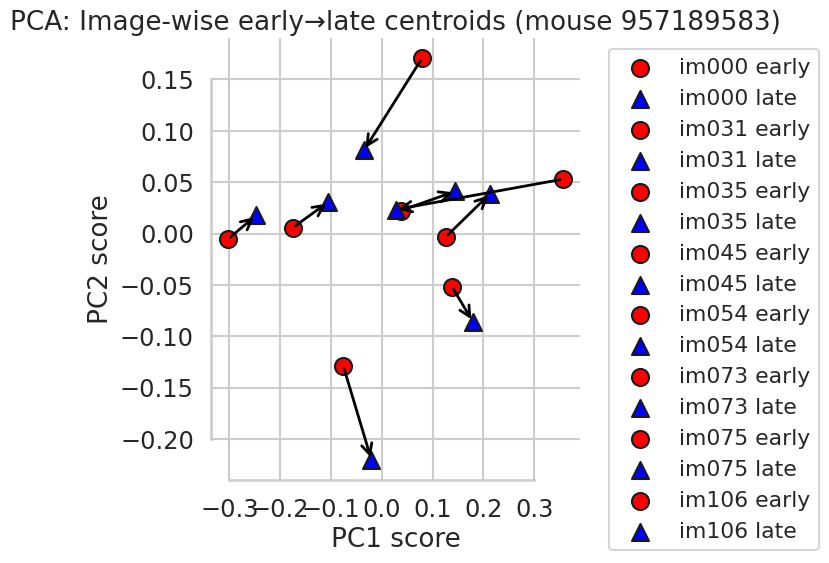

In [ ]:
# ===============================================================
# PCA across all images for one mouse
# Plot early & late centroids per image with arrows
# ===============================================================

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------------------------------
# User settings
# ---------------------------------------------------------------
SESSION_COL = "ophys_session_id"
EARLY_FRAC = 0.25
LATE_FRAC = 0.25
MAX_PC = 20
MOUSE_ID = 957189583  # Replace with actual mouse ID

# ---------------------------------------------------------------
# 1. Load and filter data
# ---------------------------------------------------------------
all_sessions = sst_data_2[SESSION_COL].unique()
if MOUSE_ID not in all_sessions:
    raise ValueError(f"MOUSE_ID {MOUSE_ID} not found. Available: {all_sessions}")

sst_mouse = sst_data_2[sst_data_2[SESSION_COL] == MOUSE_ID].copy()
imgs_mouse = sst_mouse["image_name"].unique()
print(f"Images for mouse {MOUSE_ID}: {imgs_mouse}")

# ---------------------------------------------------------------
# 2. Δ response
# ---------------------------------------------------------------
sst_mouse["delta_response"] = sst_mouse["mean_response"] - sst_mouse["baseline_response"]

# ---------------------------------------------------------------
# 3. Sort and label trials
# ---------------------------------------------------------------
sst_mouse = sst_mouse.sort_values("stimulus_presentations_id")
sst_mouse["sess_trial_idx"] = np.arange(len(sst_mouse))

N = len(sst_mouse)
early_cut = max(1, int(np.floor(EARLY_FRAC * N)))
late_start = N - max(1, int(np.ceil(LATE_FRAC * N)))

sst_mouse["block"] = np.where(
    sst_mouse["sess_trial_idx"] < early_cut, "early",
    np.where(sst_mouse["sess_trial_idx"] >= late_start, "late", "middle")
)

# ---------------------------------------------------------------
# 4. Cell × Trial matrix
# ---------------------------------------------------------------
M_all_df = sst_mouse.pivot_table(index="cell_specimen_id",
                                 columns="stimulus_presentations_id",
                                 values="delta_response",
                                 aggfunc="mean")

M_all_df = M_all_df.dropna(axis=0, how="all").dropna(axis=1, how="all").fillna(0.0)

cells_all = M_all_df.index.to_numpy()
trials_all = M_all_df.columns.to_numpy()
M_all = M_all_df.to_numpy(dtype=float)

n_cells, n_trials_total = M_all.shape
print(f"Matrix: {n_cells} cells × {n_trials_total} trials")

# ---------------------------------------------------------------
# 5. Trial metadata aligned to matrix columns
# ---------------------------------------------------------------
trial_info_df = (
    sst_mouse[["stimulus_presentations_id", "image_name", "block"]]
    .drop_duplicates(subset="stimulus_presentations_id")
    .set_index("stimulus_presentations_id")
    .reindex(trials_all)
)

trial_image_map = trial_info_df["image_name"].fillna("unknown").to_numpy()
trial_block_map = trial_info_df["block"].fillna("unknown").to_numpy()

# ---------------------------------------------------------------
# 6. PCA
# ---------------------------------------------------------------
n_components = min(MAX_PC, n_trials_total, n_cells)
pca_all = PCA(n_components=n_components).fit(M_all.T)
scores_all = pca_all.transform(M_all.T)
expl_var = pca_all.explained_variance_ratio_

# ---------------------------------------------------------------
# 7. Plot: early/late centroids per image
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid", context="talk", font_scale=1.05, palette="colorblind")
fig, ax = plt.subplots(figsize=(8, 6))

unique_images = np.unique(trial_image_map)

for img in unique_images:
    is_img = (trial_image_map == img)
    is_img_early = is_img & (trial_block_map == "early")
    is_img_late  = is_img & (trial_block_map == "late")

    if np.any(is_img_early):
        early_centroid = scores_all[is_img_early, :2].mean(axis=0)
        ax.scatter(*early_centroid, color='red', marker='o', s=150, edgecolor='k', label=f"{img} early")

    if np.any(is_img_late):
        late_centroid = scores_all[is_img_late, :2].mean(axis=0)
        ax.scatter(*late_centroid, color='blue', marker='^', s=150, edgecolor='k', label=f"{img} late")

    if np.any(is_img_early) and np.any(is_img_late):
        ax.annotate("",
            xy=late_centroid, xytext=early_centroid,
            arrowprops=dict(arrowstyle="->", lw=2, color="black")
        )

# Final touches
ax.set_xlabel("PC1 score")
ax.set_ylabel("PC2 score")
ax.set_title(f"PCA: Image-wise early→late centroids (mouse {MOUSE_ID})")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
sns.despine(trim=True)
fig.tight_layout()

plt.show()


Images for mouse 957189583: ['im045' 'im073' 'im031' 'im106' 'im035' 'im075' 'im000' 'im054']
Matrix: 18 cells × 312 trials


/tmp/ipython-input-37-2712037797.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab10", len(unique_images))  # or "tab20", "Set3", etc.


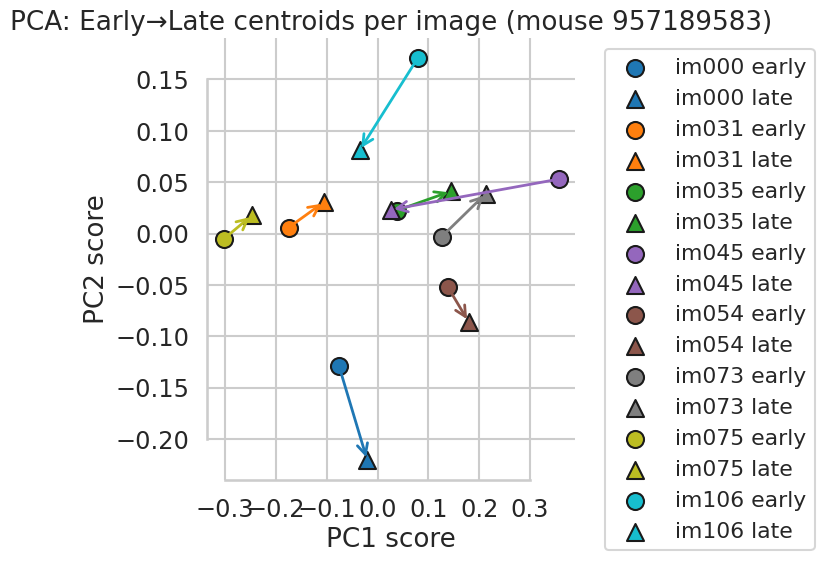

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ---------------------------------------------------------------
# User settings
# ---------------------------------------------------------------
SESSION_COL = "ophys_session_id"
EARLY_FRAC = 0.25
LATE_FRAC = 0.25
MAX_PC = 20
MOUSE_ID = 957189583  # Replace with actual mouse ID

# ---------------------------------------------------------------
# 1. Load and filter data
# ---------------------------------------------------------------
all_sessions = sst_data_2[SESSION_COL].unique()
if MOUSE_ID not in all_sessions:
    raise ValueError(f"MOUSE_ID {MOUSE_ID} not found. Available: {all_sessions}")

sst_mouse = sst_data_2[sst_data_2[SESSION_COL] == MOUSE_ID].copy()
imgs_mouse = sst_mouse["image_name"].unique()
print(f"Images for mouse {MOUSE_ID}: {imgs_mouse}")

# ---------------------------------------------------------------
# 2. Δ response
# ---------------------------------------------------------------
sst_mouse["delta_response"] = sst_mouse["mean_response"] - sst_mouse["baseline_response"]

# ---------------------------------------------------------------
# 3. Sort and label trials
# ---------------------------------------------------------------
sst_mouse = sst_mouse.sort_values("stimulus_presentations_id")
sst_mouse["sess_trial_idx"] = np.arange(len(sst_mouse))

N = len(sst_mouse)
early_cut = max(1, int(np.floor(EARLY_FRAC * N)))
late_start = N - max(1, int(np.ceil(LATE_FRAC * N)))

sst_mouse["block"] = np.where(
    sst_mouse["sess_trial_idx"] < early_cut, "early",
    np.where(sst_mouse["sess_trial_idx"] >= late_start, "late", "middle")
)

# ---------------------------------------------------------------
# 4. Cell × Trial matrix
# ---------------------------------------------------------------
M_all_df = sst_mouse.pivot_table(index="cell_specimen_id",
                                 columns="stimulus_presentations_id",
                                 values="delta_response",
                                 aggfunc="mean")

M_all_df = (
    M_all_df
    .dropna(axis=0, how="any")   # drop cells (rows) that have at least one NaN
    .dropna(axis=1, how="any")   # drop trials (cols) that have at least one NaN
)

cells_all = M_all_df.index.to_numpy()
trials_all = M_all_df.columns.to_numpy()
M_all = M_all_df.to_numpy(dtype=float)

n_cells, n_trials_total = M_all.shape
print(f"Matrix: {n_cells} cells × {n_trials_total} trials")

# ---------------------------------------------------------------
# 5. Trial metadata aligned to matrix columns
# ---------------------------------------------------------------
trial_info_df = (
    sst_mouse[["stimulus_presentations_id", "image_name", "block"]]
    .drop_duplicates(subset="stimulus_presentations_id")
    .set_index("stimulus_presentations_id")
    .reindex(trials_all)
)

trial_image_map = trial_info_df["image_name"].fillna("unknown").to_numpy()
trial_block_map = trial_info_df["block"].fillna("unknown").to_numpy()

# ---------------------------------------------------------------
# 6. PCA
# ---------------------------------------------------------------
n_components = min(MAX_PC, n_trials_total, n_cells)
pca_all = PCA(n_components=n_components).fit(M_all.T)
scores_all = pca_all.transform(M_all.T)
expl_var = pca_all.explained_variance_ratio_

# ---------------------------------------------------------------
# 7. Plot: early/late centroids per image with unique colors
# ---------------------------------------------------------------
sns.set_theme(style="whitegrid", context="talk", font_scale=1.05)

fig, ax = plt.subplots(figsize=(8, 6))

# Create a color map per image
unique_images = np.unique(trial_image_map)
colors = cm.get_cmap("tab10", len(unique_images))  # or "tab20", "Set3", etc.
image_to_color = {img: colors(i) for i, img in enumerate(unique_images)}

for img in unique_images:
    is_img = (trial_image_map == img)
    is_img_early = is_img & (trial_block_map == "early")
    is_img_late  = is_img & (trial_block_map == "late")

    if np.any(is_img_early):
        early_centroid = scores_all[is_img_early, :2].mean(axis=0)
        ax.scatter(*early_centroid, marker='o', s=150,
                   edgecolor='k', color=image_to_color[img], label=f"{img} early")

    if np.any(is_img_late):
        late_centroid = scores_all[is_img_late, :2].mean(axis=0)
        ax.scatter(*late_centroid, marker='^', s=150,
                   edgecolor='k', color=image_to_color[img], label=f"{img} late")

    if np.any(is_img_early) and np.any(is_img_late):
        ax.annotate("",
            xy=late_centroid, xytext=early_centroid,
            arrowprops=dict(arrowstyle="->", lw=2, color=image_to_color[img])
        )

# Final plot aesthetics
ax.set_xlabel("PC1 score")
ax.set_ylabel("PC2 score")
ax.set_title(f"PCA: Early→Late centroids per image (mouse {MOUSE_ID})")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
sns.despine(trim=True)
fig.tight_layout()

plt.show()


In [ ]:
# pseudo population vector with cells of all mice
# quantify the arrow distance of each mouse (magnitude of the drift)
# for all images



### To learn how to use the AllenSDK to access the full dataset, and see more in depth examples of how to interact with the data, check out the additional tutorials here:

https://colab.research.google.com/drive/163dPehppRK6JeHypgfB3gyaGQqKshNQc?usp=sharing

and in the 'Getting Started' section here:

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html


